## DIABETES PREDICTIVE PROJECT: by Augustine Ojo

#### **Project Goal:** To develop a better understanding of the relationship between lifestyle and Type 2 Diabetes in the US and to predict the possibility of developing Type 2 Diabetes, using Ai and Machine Learning Models.

##### **Aknowledgements:** Datasets were obtained from UCI Machine Learning Library and provided by CDC under CC0 Public Domain License. URL: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators


#

## **Importing Dependencies**

In [2]:
## numpy for numeric computation etc.
import numpy as np 

## pandas for Data preProcessing, Manipulation, Analysis etc.
import pandas as pd

## Data Visualization ## %matplotlib line >> to print graph right below the cell where the code is
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

## CLASSiFIFIER Algorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier

##Algorithms for Testing and Training 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report
from sklearn.metrics import r2_score, roc_curve, balanced_accuracy_score, roc_auc_score

### **Loading and Reading the Datasets**

In [4]:
df_012_raw = pd.read_csv("../Diabetes_archive/diabetes_012_health_indicators_BRFSS2015.csv")
df_bin_raw = pd.read_csv("../Diabetes_archive/diabetes_binary_health_indicators_BRFSS2015.csv") #has 253 k rows
df_50s_raw = pd.read_csv("../Diabetes_archive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")  #70K rows

## EDA: Data Exploration and Analysis 
* Since the Diabetes_012 and Diabetes_binary dataset look very similar, I only explore and analyse Diebetes_012 as representative for both datasets

#### EDA for Diabetes_012 Health Indicators Dataset **(df_012)**

In [5]:
df_012_raw.head(3)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [6]:
## Digging into the dataset 
df_012_length = print(f"Diabetic_012 Row count: {len(df_012_raw) }\n")
df_012_shape  = print(f"Diabetic_012 Row-Columns: {df_012_raw.shape }\n")
df_012_Columns =print(f"Diabetic_012 Columns Headers:\n {df_012_raw.columns.values }")

Diabetic_012 Row count: 253680

Diabetic_012 Row-Columns: (253680, 22)

Diabetic_012 Columns Headers:
 ['Diabetes_012' 'HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker' 'Stroke'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth'
 'PhysHlth' 'DiffWalk' 'Sex' 'Age' 'Education' 'Income']


In [8]:
display(df_012_raw['Age'].value_counts())
print("..............")

Age
9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: count, dtype: int64

..............


In [9]:
# #Checking the dictribution of Diabetets with value_counts
# ### Age counts expressed as percentages 

df_012_db = df_012_raw['Age'].value_counts()
df_012_pcnt = round(df_012_db/len(df_012_raw)*100,2)
df_012_overview = pd.DataFrame({"Age": df_012_db, "Age (%)" : df_012_pcnt})
df_012_overview

,Age,Age (%)
Age,,
9.0,33244,13.10
10.0,32194,12.69
8.0,30832,12.15
7.0,26314,10.37
11.0,23533,9.28
6.0,19819,7.81
13.0,17363,6.84
5.0,16157,6.37
12.0,15980,6.30


In [10]:
# Cheking for duplicates: 
df_012_raw_dup = df_012_raw[df_012_raw.duplicated(keep=False)]
df_012_raw_dup.head() 

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
25,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
29,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
44,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
52,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0


In [11]:
df_012_raw_dup.shape

(35086, 22)

In [12]:
### Need to change hard coding 
df_012_all  = df_012_raw#.value_counts()
df_012_dups = df_012_raw[df_012_raw.duplicated(keep=False)]#.value_counts

df_012_duplicate_pcnt = (35086/253679)*100 
#round(df_012_duplicate_pcnt,2)

print(f"Duplicates Count in Diabetes_012 Dataset is: {df_012_duplicate_pcnt:.2f} %")
#print(f"df_012 Duplicate Counts: {df_012_dups/len(df_012)*100:.2f}%")

Duplicates Count in Diabetes_012 Dataset is: 13.83 %


In [13]:
#df_012_raw[df_012_raw.isna()].any(axis=0)
df_012_raw[df_012_raw.isna()].any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
253675    False
253676    False
253677    False
253678    False
253679    False
Length: 253680, dtype: bool

In [14]:
# Cheking for duplicates: None found to EXCLUDING THE DUPLICATES
df_012 = df_012_raw[~df_012_raw.duplicated(keep=False)]
df_012.head(3) 

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [15]:
df_012.shape

(218594, 22)

In [16]:
# looking inside the dataset with .info
df_012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218594 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          218594 non-null  float64
 1   HighBP                218594 non-null  float64
 2   HighChol              218594 non-null  float64
 3   CholCheck             218594 non-null  float64
 4   BMI                   218594 non-null  float64
 5   Smoker                218594 non-null  float64
 6   Stroke                218594 non-null  float64
 7   HeartDiseaseorAttack  218594 non-null  float64
 8   PhysActivity          218594 non-null  float64
 9   Fruits                218594 non-null  float64
 10  Veggies               218594 non-null  float64
 11  HvyAlcoholConsump     218594 non-null  float64
 12  AnyHealthcare         218594 non-null  float64
 13  NoDocbcCost           218594 non-null  float64
 14  GenHlth               218594 non-null  float64
 15  MentH

In [17]:
#Checking for unique values 
df_012.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [18]:
# using describe function to get statistical data on the dataset
round(df_012.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,218594.0,0.34,0.74,0.0,0.0,0.0,0.0,2.0
HighBP,218594.0,0.46,0.50,0.0,0.0,0.0,1.0,1.0
HighChol,218594.0,0.45,0.50,0.0,0.0,0.0,1.0,1.0
CholCheck,218594.0,0.96,0.20,0.0,1.0,1.0,1.0,1.0
BMI,218594.0,28.82,6.88,12.0,24.0,28.0,32.0,98.0
Smoker,218594.0,0.47,0.50,0.0,0.0,0.0,1.0,1.0
Stroke,218594.0,0.05,0.21,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,218594.0,0.11,0.31,0.0,0.0,0.0,0.0,1.0
PhysActivity,218594.0,0.72,0.45,0.0,0.0,1.0,1.0,1.0
Fruits,218594.0,0.60,0.49,0.0,0.0,1.0,1.0,1.0


In [19]:
## Digging into the dataset 
df_012_length = print(f"Diabetic_012 Row count: {len(df_012) }\n")
df_012_shape  = print(f"Diabetic_012 Row vs Columns: {df_012.shape }\n")
df_012_Columns =print(f"Diabetic_012 Columns Headers:\n {df_012.columns.values }")
print("......................")

Diabetic_012 Row count: 218594

Diabetic_012 Row vs Columns: (218594, 22)

Diabetic_012 Columns Headers:
 ['Diabetes_012' 'HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker' 'Stroke'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth'
 'PhysHlth' 'DiffWalk' 'Sex' 'Age' 'Education' 'Income']
......................


In [20]:
#Checking the dictribution of Diabetets with value_counts
display(df_012['Diabetes_012'].value_counts())
print("..............")

### Diabetes_012 counts expressed as percentages 
df_012_db = df_012['Diabetes_012'].value_counts()
df_012_pcnt = round(df_012['Diabetes_012'].value_counts()/len(df_012)*100,2)
df_012_overview = pd.DataFrame({"Diabetes_012": df_012_db,"Diabetes_012 (%)" : df_012_pcnt })

display(df_012_overview) 
print("..............")
#display(df_012['Diabetes_012'].value_counts().sum()) 

print(f"Sum of Rows Without Duplicates: {df_012['Diabetes_012'].value_counts().sum()}")

Diabetes_012
0.0    179100
2.0     34867
1.0      4627
Name: count, dtype: int64

..............


,Diabetes_012,Diabetes_012 (%)
Diabetes_012,,
0.0,179100,81.93
2.0,34867,15.95
1.0,4627,2.12


..............
Sum of Rows Without Duplicates: 218594


##### Post Data Cleaning Observation for Diabetes_012 Dataset:
*
*
*

#### EDA for Diabetes_binary Health Indicators Dataset **(df_bin)**

In [21]:
df_bin_raw.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [22]:
## Digging into the dataset 
df_bin_length = print(f"Diabetic_012 Row count: {len(df_bin_raw) }\n")
df_bin_shape  = print(f"Diabetic_012 Row-Columns: {df_bin_raw.shape }\n")
df_bin_Columns =print(f"Diabetic_012 Columns Headers:\n {df_bin_raw.columns.values }")

Diabetic_012 Row count: 253680

Diabetic_012 Row-Columns: (253680, 22)

Diabetic_012 Columns Headers:
 ['Diabetes_binary' 'HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker' 'Stroke'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth'
 'PhysHlth' 'DiffWalk' 'Sex' 'Age' 'Education' 'Income']


In [23]:
# Cheking for duplicates: 
df_bin_raw_dup = df_bin_raw[df_bin_raw.duplicated(keep=False)]
df_bin_raw_dup.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
25,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
29,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0


In [24]:
df_bin_raw_dup.shape

(35575, 22)

In [25]:
### Need to change hard coding 
df_bin_all  = df_bin_raw#.head()
df_bin_dups = df_bin_raw[df_bin_raw.duplicated(keep=False)]
# ##((df_bin[df_bin.duplicated(keep=False)])/df_bin)*100
df_bin_dups.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
25,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
29,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0


In [26]:
### Need to change hard coding 
df_bin_all  = df_bin_raw#.head()
df_bin_dups = df_bin_raw[df_bin_raw.duplicated(keep=False)]
# ##((df_bin[df_bin.duplicated(keep=False)])/df_bin)*100

df_bin_duplicate_pcnt = (35575/253680)*100 
#round(df_bin_duplicate_pcnt,2)

print(f"Duplicates Count in the Diabetes_binary dataset: {df_bin_duplicate_pcnt:.2f} %")

Duplicates Count in the Diabetes_binary dataset: 14.02 %


In [27]:
df_bin = df_bin_raw[~df_bin_raw.duplicated(keep=False)]
df_bin.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [28]:
## Looking into dataset internals post data cleaning
df_bin_length = print(f"Diabetic Binary Row count: {len(df_bin) }\n")
df_bin_shape  = print(f"Diabetic Binary Row-Columns: {df_bin.shape }\n")
df_bin_Columns =print(f"Diabetic Binary Columns Headers:\n {df_bin.columns.values }")
print("......................")

Diabetic Binary Row count: 218105

Diabetic Binary Row-Columns: (218105, 22)

Diabetic Binary Columns Headers:
 ['Diabetes_binary' 'HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker' 'Stroke'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth'
 'PhysHlth' 'DiffWalk' 'Sex' 'Age' 'Education' 'Income']
......................


In [29]:

## Displaying Diabetes binary distributions and in percentages
display(df_bin['Diabetes_binary'].value_counts())
print('...............')

df_bin_db = df_bin['Diabetes_binary'].value_counts()
df_bin_pcnt = round(df_bin['Diabetes_binary'].value_counts()/len(df_bin)*100,2)
df_bin_overview = pd.DataFrame({"Diabetes_binary": df_bin_db, 
                             "Diabetes_binary (%)" : df_bin_pcnt })
print(df_bin_overview) 

print("\n..................\n\nData split Diabetes_binary is about 84% to 16% ")


Diabetes_binary
0.0    183238
1.0     34867
Name: count, dtype: int64

...............
                 Diabetes_binary  Diabetes_binary (%)
Diabetes_binary                                      
0.0                       183238                84.01
1.0                        34867                15.99

..................

Data split Diabetes_binary is about 84% to 16% 


In [30]:
df_bin.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [31]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218105 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       218105 non-null  float64
 1   HighBP                218105 non-null  float64
 2   HighChol              218105 non-null  float64
 3   CholCheck             218105 non-null  float64
 4   BMI                   218105 non-null  float64
 5   Smoker                218105 non-null  float64
 6   Stroke                218105 non-null  float64
 7   HeartDiseaseorAttack  218105 non-null  float64
 8   PhysActivity          218105 non-null  float64
 9   Fruits                218105 non-null  float64
 10  Veggies               218105 non-null  float64
 11  HvyAlcoholConsump     218105 non-null  float64
 12  AnyHealthcare         218105 non-null  float64
 13  NoDocbcCost           218105 non-null  float64
 14  GenHlth               218105 non-null  float64
 15  MentH

In [32]:
round(df_bin.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,218105.0,0.16,0.37,0.0,0.0,0.0,0.0,1.0
HighBP,218105.0,0.46,0.50,0.0,0.0,0.0,1.0,1.0
HighChol,218105.0,0.45,0.50,0.0,0.0,0.0,1.0,1.0
CholCheck,218105.0,0.96,0.20,0.0,1.0,1.0,1.0,1.0
BMI,218105.0,28.82,6.89,12.0,24.0,28.0,32.0,98.0
Smoker,218105.0,0.47,0.50,0.0,0.0,0.0,1.0,1.0
Stroke,218105.0,0.05,0.21,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,218105.0,0.11,0.31,0.0,0.0,0.0,0.0,1.0
PhysActivity,218105.0,0.72,0.45,0.0,0.0,1.0,1.0,1.0
Fruits,218105.0,0.60,0.49,0.0,0.0,1.0,1.0,1.0


##### Post Data Cleaning Observation for Diabetse_Binary Dataset
*
*
*

#### EDA for Diabetes_Binary 5050split Health Indicators Dataset **(df_50s)**

In [33]:
df_50s_raw.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0


In [34]:
df_50s_raw.shape

(70692, 22)

In [35]:
#Checking for dataset counts by row and column

df_50s_length = print(f"Diabetic_binary Row count: {len(df_50s_raw) }\n")
df_50s_shape  = print(f"Diabetic_binary Row, Columns: {df_50s_raw.shape }\n")
df_50s_Columns =print(f"Diabetic_binary Columns Headers:\n {df_50s_raw.columns.values }")

Diabetic_binary Row count: 70692

Diabetic_binary Row, Columns: (70692, 22)

Diabetic_binary Columns Headers:
 ['Diabetes_binary' 'HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker' 'Stroke'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth'
 'PhysHlth' 'DiffWalk' 'Sex' 'Age' 'Education' 'Income']


In [36]:
#Checking for Nan values in the column (axis=1) with .isna() function

df_50s_raw[df_50s_raw.isna()].any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Length: 70692, dtype: bool

In [37]:
#Checking for Nan values in the row (axis=0) with .isna() function
df_50s_raw[df_50s_raw.isna()].any(axis=0)

Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [38]:
# Cheking for duplicates: 
df_50s_raw_dup = df_50s_raw[df_50s_raw.duplicated(keep=False)]
df_50s_raw_dup.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
12,0.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0
20,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0


In [39]:
df_50s_raw_dup.shape

(2803, 22)

In [40]:
### Need to change hard coding 
df_50s_all  = df_50s_raw#.head()
df_50s_dups = df_50s_raw[df_50s_raw.duplicated(keep=False)]

##((df_012[df_012.duplicated(keep=False)])/df_012)*100  (not Working yet)
df_50s_duplicate_pcnt = (2803/70692)*100 
#round(df_50s_duplicate_pcnt,2)
print(f"Duplicates Count in Diabetes _Binary_5050Split data is: {df_50s_duplicate_pcnt:.2f} %")


Duplicates Count in Diabetes _Binary_5050Split data is: 3.97 %


In [41]:
df_50s = df_50s_raw[~df_50s_raw.duplicated(keep=False)]
df_50s.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0


In [42]:
df_50s_length = print(f"Diabetic_binary Row count: {len(df_50s) }\n")
df_50s_shape  = print(f"Diabetic_binary Row, Columns: {df_50s.shape }\n")
df_50s_Columns =print(f"Diabetic_binary Columns Headers:\n {df_50s.columns.values }")

Diabetic_binary Row count: 67889

Diabetic_binary Row, Columns: (67889, 22)

Diabetic_binary Columns Headers:
 ['Diabetes_binary' 'HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker' 'Stroke'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth'
 'PhysHlth' 'DiffWalk' 'Sex' 'Age' 'Education' 'Income']


In [43]:
## Displaying Diabetes binary counts with value count function 
display(df_50s['Diabetes_binary'].value_counts())
print('...............')

## Converting counts to DataFrame inorder to express in Percentage 
df_50s_db = df_50s['Diabetes_binary'].value_counts()
df_50s_pcnt = round(df_50s['Diabetes_binary'].value_counts()/len(df_50s)*100,2)

df_50s_overview = pd.DataFrame({"Diabetes_binary": df_50s_db, 
                             "Diabetes_binary (%)" : df_50s_pcnt })
df_50s_overview 


Diabetes_binary
1.0    34867
0.0    33022
Name: count, dtype: int64

...............


,Diabetes_binary,Diabetes_binary (%)
Diabetes_binary,,
1.0,34867,51.36
0.0,33022,48.64


In [44]:
df_50s.groupby(["Diabetes_binary"])['BMI'].value_counts()

Diabetes_binary  BMI 
0.0              27.0    3278
                 26.0    2720
                 24.0    2590
                 25.0    2356
                 23.0    2170
                         ... 
1.0              78.0       1
                 80.0       1
                 83.0       1
                 85.0       1
                 95.0       1
Name: count, Length: 150, dtype: int64

In [45]:
df_50s.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [46]:
df_50s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67889 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       67889 non-null  float64
 1   HighBP                67889 non-null  float64
 2   HighChol              67889 non-null  float64
 3   CholCheck             67889 non-null  float64
 4   BMI                   67889 non-null  float64
 5   Smoker                67889 non-null  float64
 6   Stroke                67889 non-null  float64
 7   HeartDiseaseorAttack  67889 non-null  float64
 8   PhysActivity          67889 non-null  float64
 9   Fruits                67889 non-null  float64
 10  Veggies               67889 non-null  float64
 11  HvyAlcoholConsump     67889 non-null  float64
 12  AnyHealthcare         67889 non-null  float64
 13  NoDocbcCost           67889 non-null  float64
 14  GenHlth               67889 non-null  float64
 15  MentHlth              67

In [47]:
round(df_50s.describe().T,2)


,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,67889.0,0.51,0.50,0.0,0.0,1.0,1.0,1.0
HighBP,67889.0,0.58,0.49,0.0,0.0,1.0,1.0,1.0
HighChol,67889.0,0.53,0.50,0.0,0.0,1.0,1.0,1.0
CholCheck,67889.0,0.97,0.16,0.0,1.0,1.0,1.0,1.0
BMI,67889.0,30.02,7.18,12.0,25.0,29.0,33.0,98.0
Smoker,67889.0,0.49,0.50,0.0,0.0,0.0,1.0,1.0
Stroke,67889.0,0.06,0.25,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,67889.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
PhysActivity,67889.0,0.69,0.46,0.0,0.0,1.0,1.0,1.0
Fruits,67889.0,0.60,0.49,0.0,0.0,1.0,1.0,1.0


In [48]:
### Checking for chnages in the dataset:
df_50s_length = print(f"Diabetic_binary Row count: {len(df_50s) }\n")
df_50s_shape  = print(f"Diabetic_binary Row, Columns: {df_50s.shape }\n")
df_50s_Columns =print(f"Diabetic_binary Columns Headers:\n {df_50s.columns.values }")
print('........................')

Diabetic_binary Row count: 67889

Diabetic_binary Row, Columns: (67889, 22)

Diabetic_binary Columns Headers:
 ['Diabetes_binary' 'HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker' 'Stroke'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth'
 'PhysHlth' 'DiffWalk' 'Sex' 'Age' 'Education' 'Income']
........................


### SUMMARY of ANALYSIS: Boxplot Comparism of the Three Datasets

<Axes: xlabel='Diabetes_012'>

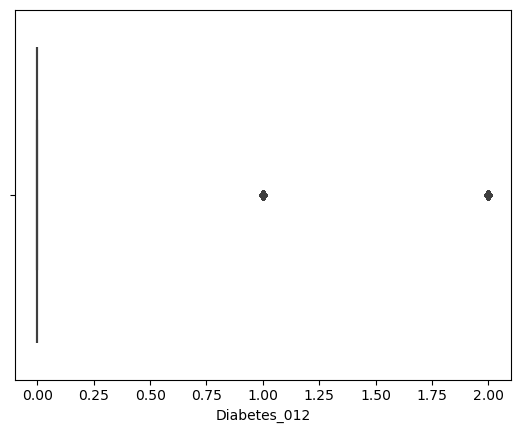

In [49]:
sns.boxplot(x=df_012['Diabetes_012'])

<Axes: xlabel='Diabetes_binary'>

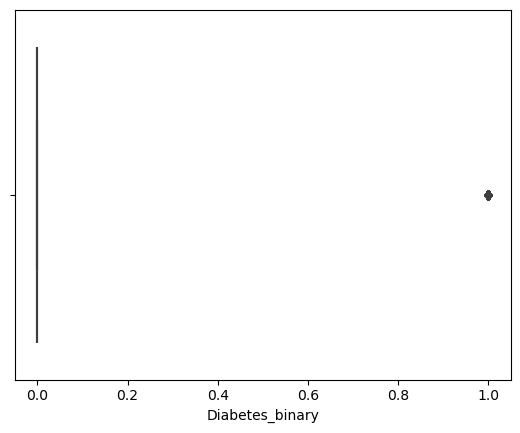

In [50]:
sns.boxplot(x=df_bin['Diabetes_binary'])

<Axes: xlabel='Diabetes_binary'>

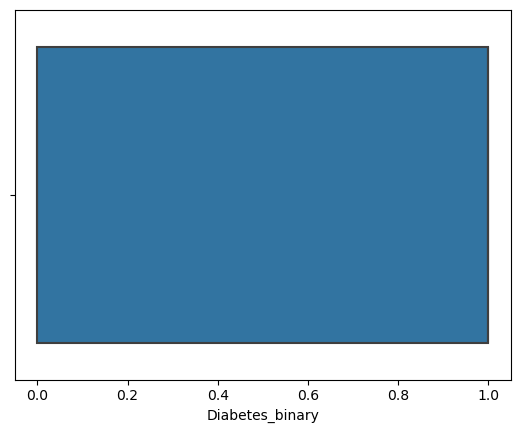

In [51]:
sns.boxplot(x=df_50s['Diabetes_binary'])

##### Post Data Cleaning Observation for Diabetes 5050Split Dataset
*
*
*


#

## Visualization and Statistics Analysis

#### Mean vs Std Visualization

In [52]:
df_012_mean_std_df = df_012.describe().T.loc[: , ["mean", "std"]]
df_012_mean_std_df

,mean,std
Diabetes_012,0.340179,0.737205
HighBP,0.464377,0.498731
HighChol,0.448109,0.497301
CholCheck,0.958091,0.200381
BMI,28.819858,6.881724
Smoker,0.473911,0.499320
Stroke,0.047010,0.211660
HeartDiseaseorAttack,0.107793,0.310120
PhysActivity,0.721795,0.448116
Fruits,0.604303,0.489001


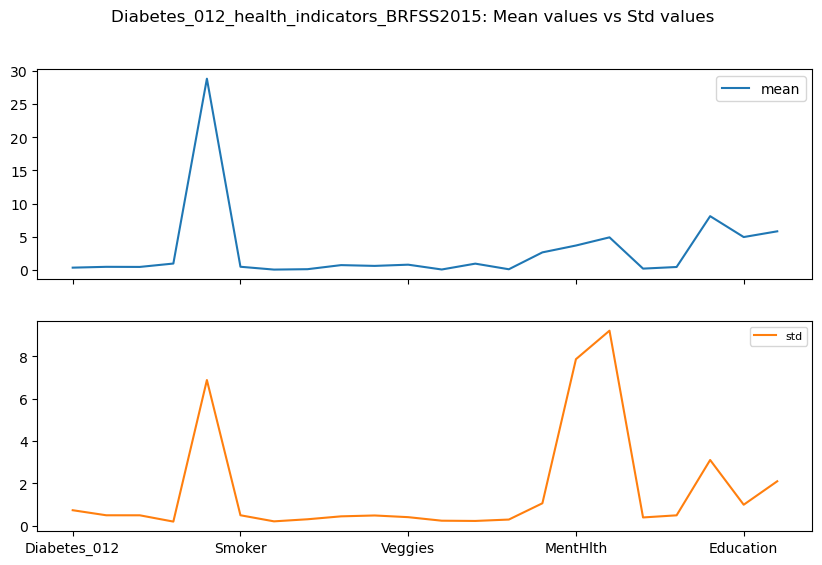

In [53]:
df_012_mean_std_df.plot(
    title="Diabetes_012_health_indicators_BRFSS2015: Mean values vs Std values",
    figsize = (10,6), 
    fontsize = 10,
    subplots=True
    )
plt.legend(fontsize = 8)
plt.show()

##### Obsevation from Mean vs Std Plot: There is discernable correlations between Mean Values and Std Values

In [54]:
# Data exploration for unique values
df_012.nunique().sort_values()#value_counts()
#display(df_012.value_counts())

Veggies                  2
HighBP                   2
HighChol                 2
CholCheck                2
Sex                      2
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
DiffWalk                 2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
Diabetes_012             3
GenHlth                  5
Education                6
Income                   8
Age                     13
MentHlth                31
PhysHlth                31
BMI                     84
dtype: int64

In [55]:
df_012.groupby(["Diabetes_012"])['BMI'].value_counts()

Diabetes_012  BMI 
0.0           27.0    16996
              26.0    14339
              24.0    13642
              25.0    12109
              28.0    11615
                      ...  
2.0           78.0        1
              80.0        1
              83.0        1
              85.0        1
              95.0        1
Name: count, Length: 217, dtype: int64

#### Features Analysis and Visualization with Frequency Tables and Value Counts

In [56]:
# # BMI Counts vs BMI Counts Percentages
bmi_df_012 = df_012['BMI'].value_counts()
bmip_df_012 = round(df_012['BMI'].value_counts()/len(df_012)*100,2)
bmip_cumsum_df = np.cumsum(bmip_df_012)

bmi_overview = pd.DataFrame({"BMI Counts": bmi_df_012, 
                             "BMI Counts (%)" : bmip_df_012, 
                             "Cumulative (%)" : bmip_cumsum_df})
bmi_overview.head(5)  
## Note the number of rows (20) in the .head

,BMI Counts,BMI Counts (%),Cumulative (%)
BMI,,,
27.0,20096,9.19,9.19
26.0,16586,7.59,16.78
24.0,15314,7.01,23.79
28.0,14100,6.45,30.24
25.0,13773,6.30,36.54


##### Observation: **(25%)** or 20 of the 80 BMI value counts accounted for over 91.45% of the total value counts.

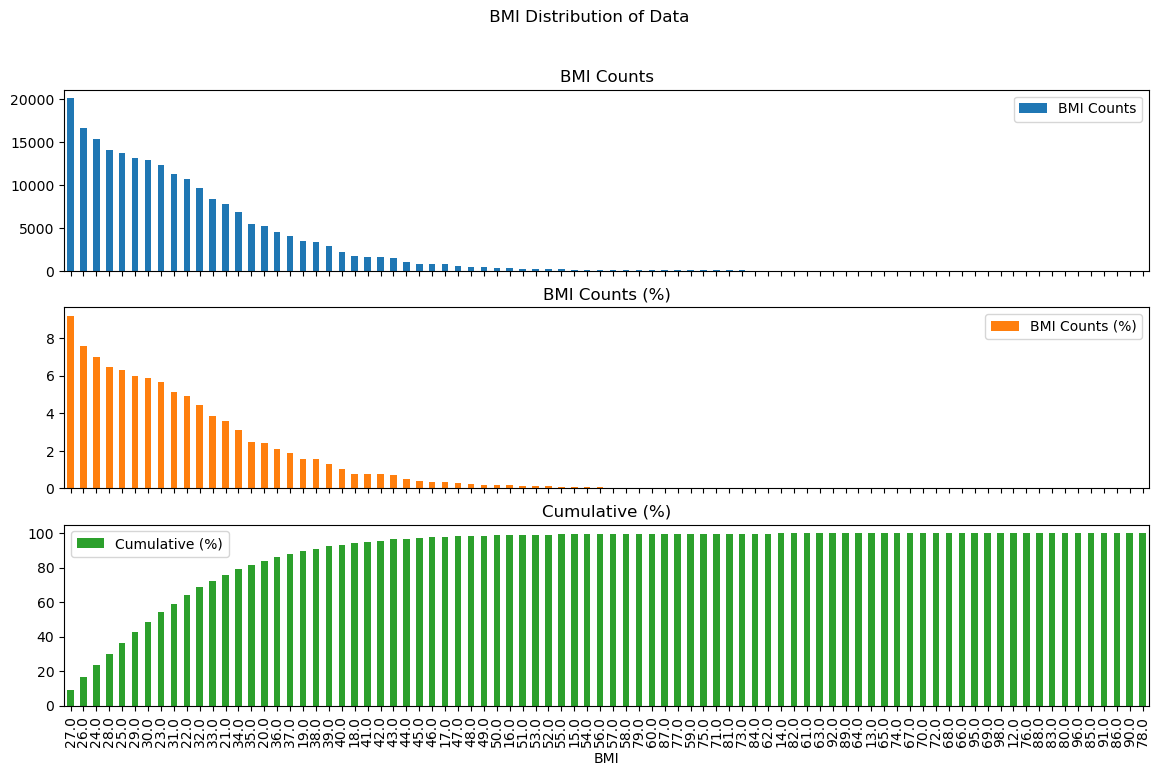

In [57]:
bmi_overview.plot(kind="bar",
   title=" BMI Distribution of Data ",
    figsize = (14,8), 
    #font_scale = 1.4,
    fontsize = 10,
    subplots=True
    );

c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


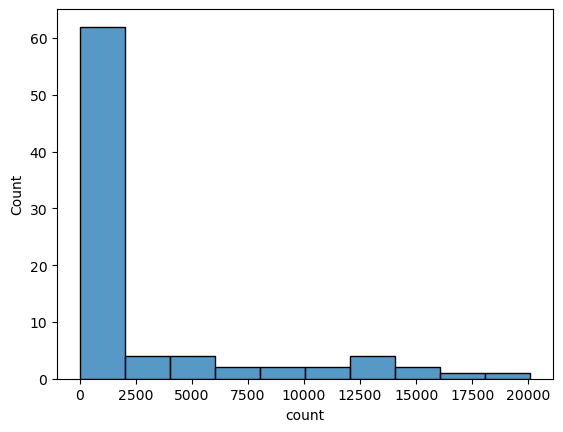

In [58]:
# Visualizing BMI using histplot from Seaborn Visualization Library

sns.histplot(bmi_df_012, bins=10);

### Hunting for Outliers with Graphical Visualizations

In [59]:
df_012_mean =np.mean(df_012['BMI'])
df_012_std = np.std(df_012['BMI'])
print(f" BMI Mean: {df_012_mean:.2f}%")
print(f" BMI std : {df_012_std:.2f}%")

#[BMI for BMI in df_012['BMI'] if (BMI < mean - 3*df_012_std) or (BMI> mean + 3*df_012['BMI'])]

 BMI Mean: 28.82%
 BMI std : 6.88%


<Axes: xlabel='BMI'>

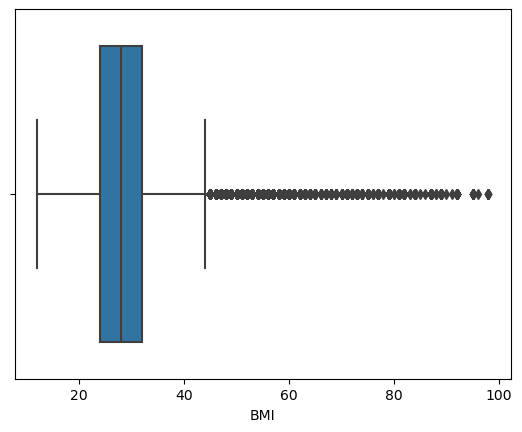

In [60]:
# Visualizing BMI data using BoxPlot from Seaborn Visualization Library

sns.boxplot(x=df_012['BMI'])


In [61]:
##df_012['Diabetes_012'].value_counts()
Age_df = df_012['Age'].value_counts()
Agep_df = round(df_012['Age'].value_counts()/len(df_012)*100,2)
Agep_cumsum_df = np.cumsum(Agep_df)

Age_df_overview = pd.DataFrame({"Age group Count": Age_df, "Age group Count (%)":Agep_df, " Cumulative(%)": Agep_cumsum_df,})
Age_df_overview.head(15)

,Age group Count,Age group Count (%),Cumulative(%)
Age,,,
9.0,28159,12.88,12.88
10.0,27617,12.63,25.51
8.0,25783,11.79,37.30
7.0,21871,10.01,47.31
11.0,21099,9.65,56.96
13.0,16357,7.48,64.44
6.0,16293,7.45,71.89
12.0,14939,6.83,78.72
5.0,13229,6.05,84.77


<Axes: xlabel='Age'>

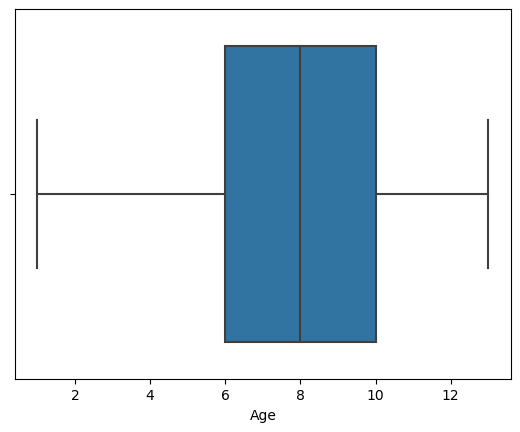

In [62]:
sns.boxplot(x=df_012['Age'])

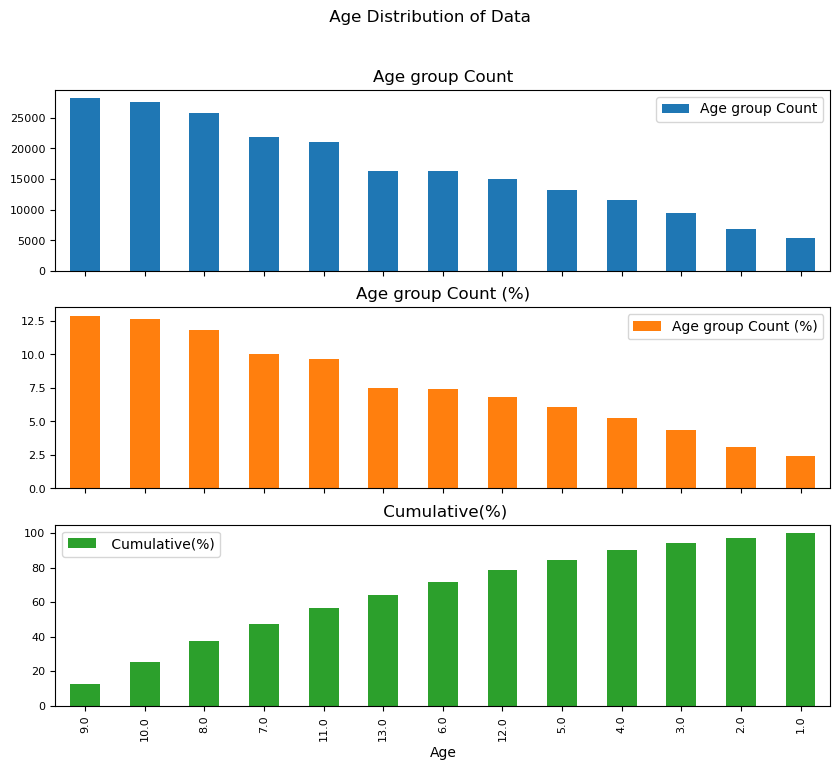

In [63]:
Age_df_overview.plot(kind="bar",
   title=" Age Distribution of Data ",
    figsize = (10,8), 
    #font_scale = 1.4,
    fontsize = 8,
    subplots=True
    );

In [64]:
# Mental Health Counts vs Mental Health Counts Percentages
mentH_df = df_012['MentHlth'].value_counts()
mentHp_df = round(df_012['MentHlth'].value_counts()/len(df_012)*100,2)
mentHp_cumsum_df = np.cumsum(mentHp_df)

mentH_overview = pd.DataFrame({" Count": mentH_df, " Count (%)": mentHp_df, " Cumulative(%)": mentHp_cumsum_df})
mentH_overview.head(15)

,Count,Count (%),Cumulative(%)
MentHlth,,,
0.0,142098,65.01,65.01
2.0,12438,5.69,70.70
30.0,12072,5.52,76.22
5.0,8817,4.03,80.25
1.0,8128,3.72,83.97
3.0,7233,3.31,87.28
10.0,6332,2.90,90.18
15.0,5497,2.51,92.69
4.0,3760,1.72,94.41


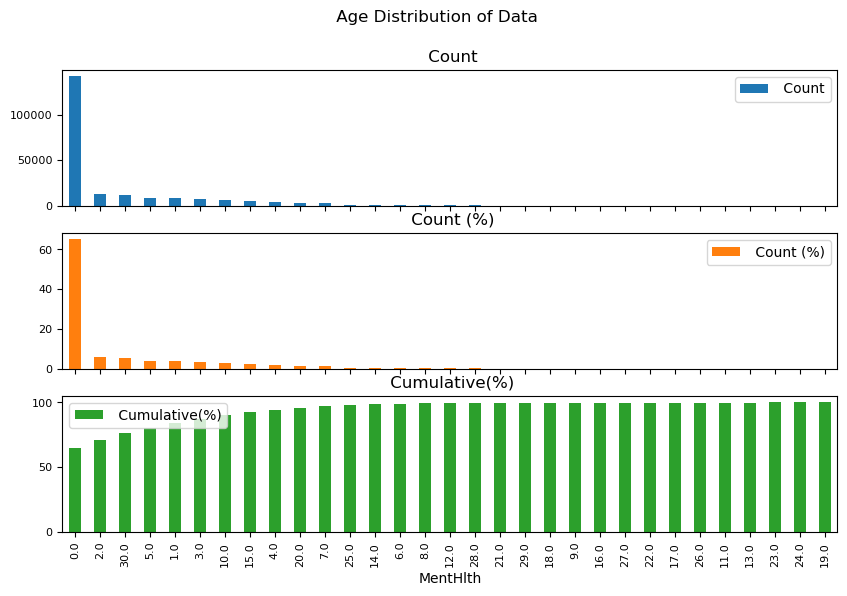

In [65]:
mentH_overview.plot(kind="bar",
   title=" Age Distribution of Data ",
    figsize = (10,6), 
    #font_scale = 1.4,
    fontsize = 8,
    subplots=True
    );

In [66]:
# Mental Health Counts vs Mental Health Counts Percentages
physH_df = df_012['PhysHlth'].value_counts()
PhysHp_df = round(df_012['PhysHlth'].value_counts()/len(df_012)*100,2)
PhysHp_cumsum_df = np.cumsum(PhysHp_df)

physH_df_overview = pd.DataFrame({" Count": physH_df, "Count (%)": PhysHp_df, "Cumulative (%)": PhysHp_cumsum_df })
physH_df_overview.head(15)

,Count,Count (%),Cumulative (%)
PhysHlth,,,
0.0,126282,57.77,57.77
30.0,19372,8.86,66.63
2.0,14278,6.53,73.16
1.0,10830,4.95,78.11
3.0,8384,3.84,81.95
5.0,7572,3.46,85.41
10.0,5581,2.55,87.96
15.0,4912,2.25,90.21
7.0,4524,2.07,92.28


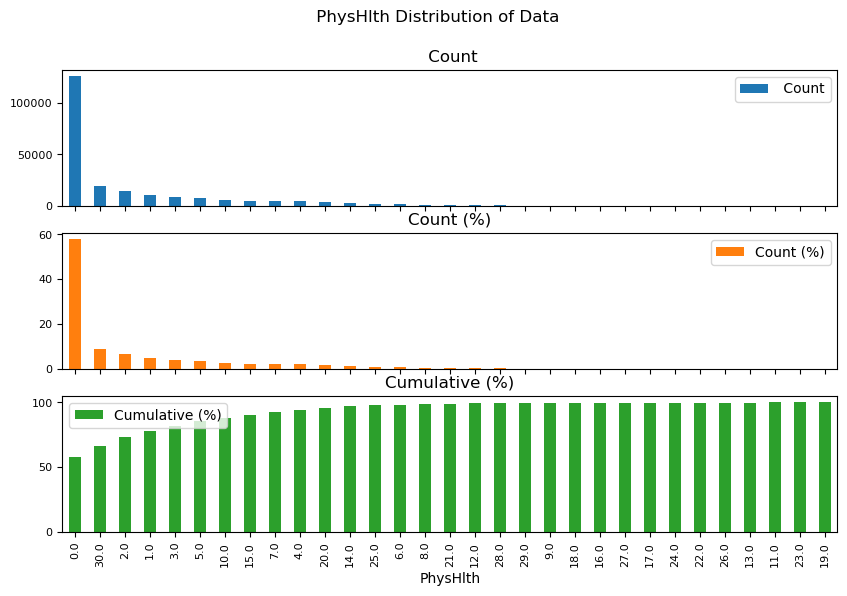

In [67]:
physH_df_overview.plot(kind="bar",
   title=" PhysHlth Distribution of Data ",
    figsize = (10,6), 
    #font_scale = 1.4,
    fontsize = 8,
    subplots=True
    );

In [68]:
# Income levels Count vs Income Levels Count Percentages
inc_df = df_012['Income'].value_counts()
incp_df = round(df_012['Income'].value_counts()/len(df_012)*100,2)
incp_cumsum_df = np.cumsum(incp_df)

Inc_df_overview = pd.DataFrame({" Count": inc_df, "Count (%)": incp_df, "Cumulative(%)": incp_cumsum_df })
Inc_df_overview.head(10)

,Count,Count (%),Cumulative(%)
Income,,,
8.0,64522,29.52,29.52
7.0,38210,17.48,47.00
6.0,33836,15.48,62.48
5.0,24879,11.38,73.86
4.0,19789,9.05,82.91
3.0,15854,7.25,90.16
2.0,11731,5.37,95.53
1.0,9773,4.47,100.00


<Axes: xlabel='Income'>

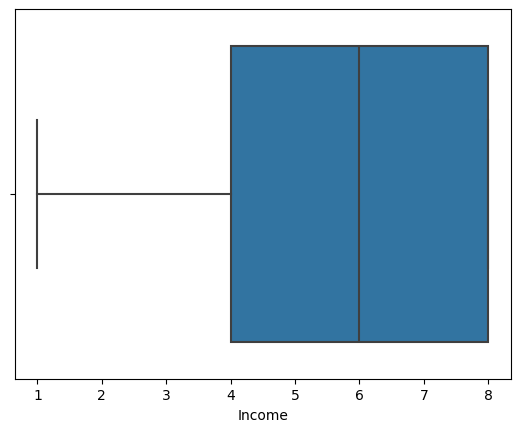

In [69]:
sns.boxplot(x=df_012['Income'])

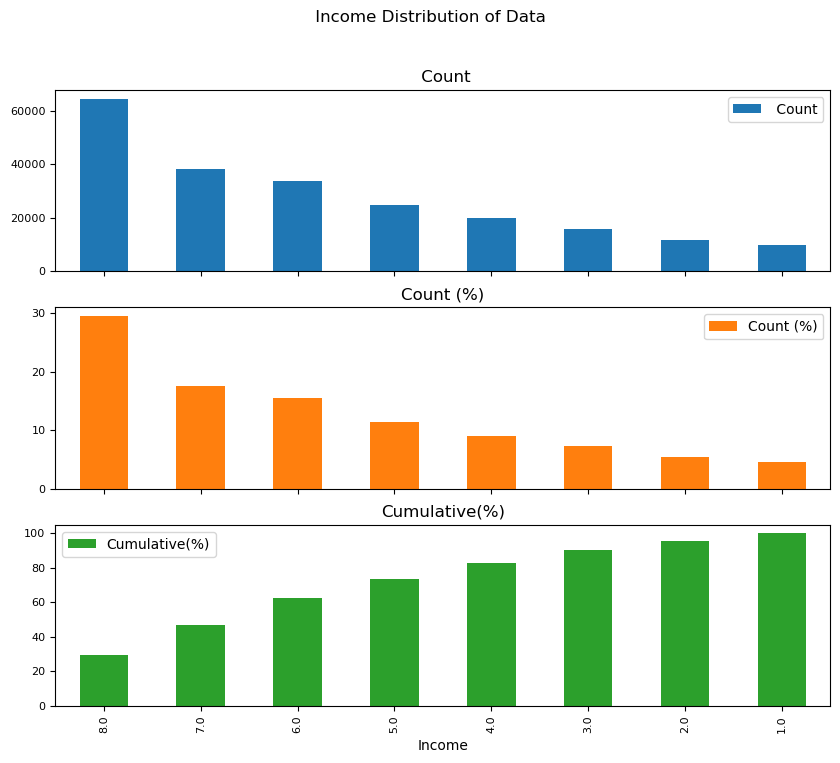

In [70]:
Inc_df_overview.plot(kind="bar",
   title=" Income Distribution of Data ",
    figsize = (10,8), 
    #font_scale = 1.4,
    fontsize = 8,
    subplots=True
    );

In [71]:
# Income levels Count vs Income Levels Count Percentages
edu_df = df_012['Education'].value_counts()
edup_df = round(df_012['Education'].value_counts()/len(df_012)*100,2)
edup_cumsum_df = np.cumsum(edup_df)

edu_df_overview = pd.DataFrame({" Count": edu_df, " Count (%)": edup_df, " Cumulative (%)": edup_cumsum_df })
edu_df_overview.head(10)

,Count,Count (%),Cumulative (%)
Education,,,
6.0,80896,37.01,37.01
5.0,64186,29.36,66.37
4.0,59845,27.38,93.75
3.0,9456,4.33,98.08
2.0,4037,1.85,99.93
1.0,174,0.08,100.01


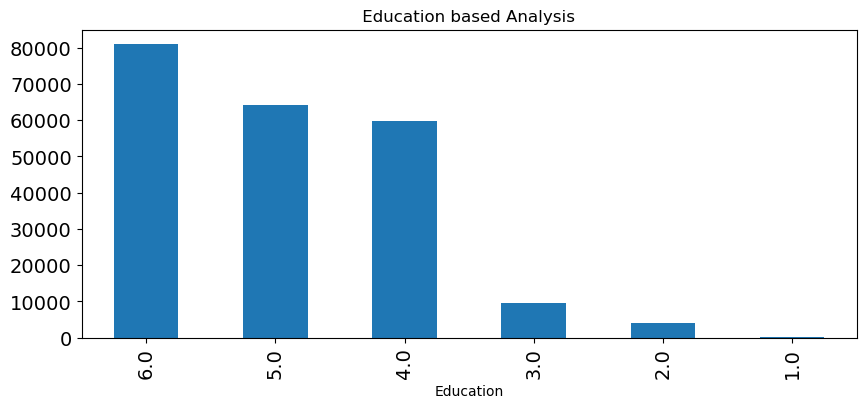

In [72]:
df_012['Education'].value_counts().plot(kind="bar",
   title=" Education based Analysis ",
    figsize = (10,4), 
    fontsize = 14,
);

<Axes: xlabel='Education'>

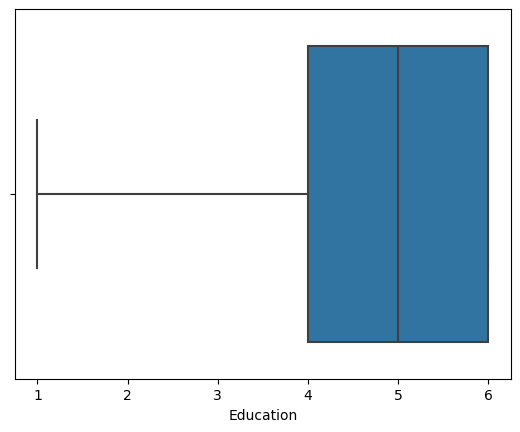

In [73]:
sns.boxplot(x=df_012['Education'])

In [74]:
##df_012['Diabetes_012'].value_counts()
diab_df = df_012['Diabetes_012'].value_counts()
diebp_df = round(df_012['Diabetes_012'].value_counts()/len(df_012)*100,2)

diab_df_overview = pd.DataFrame({"Diabetics Count": diab_df, "Diabetic Count (%)": diebp_df})
diab_df_overview.head(10)


,Diabetics Count,Diabetic Count (%)
Diabetes_012,,
0.0,179100,81.93
2.0,34867,15.95
1.0,4627,2.12


In [75]:
diab_df = df_012['Diabetes_012'].value_counts().sum()
diab_df

218594

In [76]:
# sns.boxplot(x=df_012['Diabetes_012'])

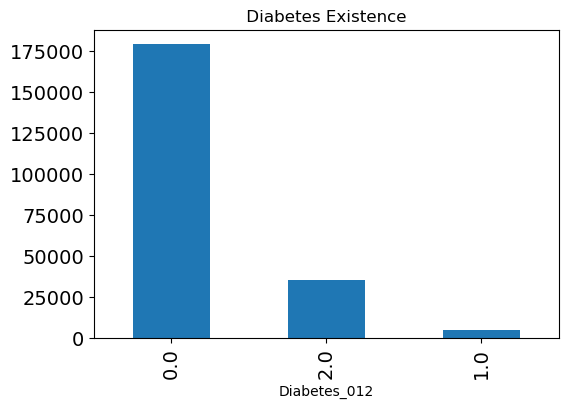

In [77]:
df_012['Diabetes_012'].value_counts().plot(kind="bar",
   title=" Diabetes Existence ",
    figsize = (6,4), 
    fontsize = 14,
);

In [78]:
#counts()
gHlth_df = df_012['GenHlth'].value_counts()
gHlthp_df = round(df_012['GenHlth'].value_counts()/len(df_012)*100,2)
gHlthp_cumsum_df = np.cumsum(gHlthp_df)

gHlth_df_overview = pd.DataFrame({"GenHlth Count": gHlth_df, "GenHlth Count (%)":gHlthp_df, "GenHlth Cum (%)":gHlthp_cumsum_df })
gHlth_df_overview.head(10)

,GenHlth Count,GenHlth Count (%),GenHlth Cum (%)
GenHlth,,,
3.0,72122,32.99,32.99
2.0,71739,32.82,65.81
4.0,31522,14.42,80.23
1.0,31136,14.24,94.47
5.0,12075,5.52,99.99


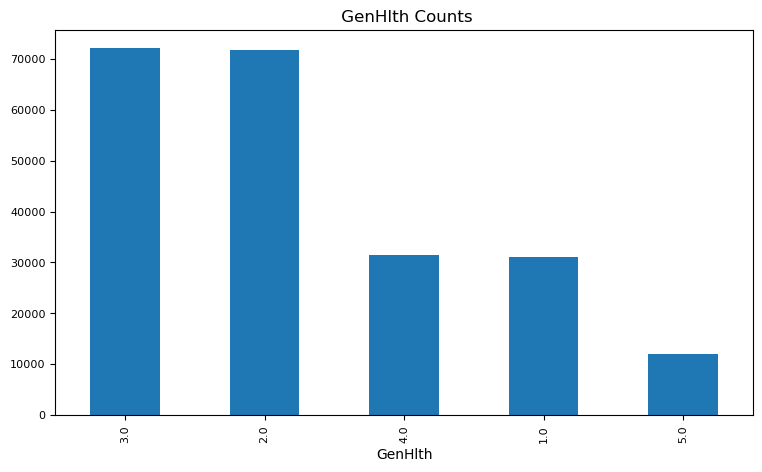

In [79]:
df_012['GenHlth'].value_counts().plot.bar(x='GenHlth',y='GenHlth Count', #color='blue',
   title=" GenHlth Counts",
     figsize = (9,5), 
     fontsize = 8,
    );
#cmap="RdYlGn",

In [80]:
# df_50s.groupby(["Diabetes_binary"])['BMI'].value_counts()

In [81]:
##df_012['Diabetes_012'].value_counts()
AnyHC_df = df_012['AnyHealthcare'].value_counts()
AnyHcp_df = round(df_012['AnyHealthcare'].value_counts()/len(df_012)*100,2)

AnyHC_df_overview = pd.DataFrame({"AnyHealthcareCount": AnyHC_df, "AnyHealthcareCount (%)":AnyHcp_df})
AnyHC_df_overview.head(10)

,AnyHealthcareCount,AnyHealthcareCount (%)
AnyHealthcare,,
1.0,206228,94.34
0.0,12366,5.66


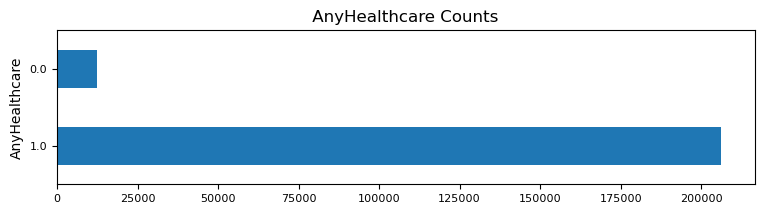

In [82]:
df_012['AnyHealthcare'].value_counts().plot.barh(x='AnyHealthcare', y='counts',
   title=" AnyHealthcare Counts ",
     figsize = (9,2), 
     fontsize = 8,
);

In [83]:
##df_012['Diabetes_012'].value_counts()
HAlcohol_df = df_012['HvyAlcoholConsump'].value_counts()
HAlcoholp_df = round(df_012['HvyAlcoholConsump'].value_counts()/len(df_012)*100,2)

HAlcohol_df_overview = pd.DataFrame({"HvyAlcoholConsump Count": HAlcohol_df, "HvyAlcoholConsump Count (%)":HAlcoholp_df})
HAlcohol_df_overview.head(10)

,HvyAlcoholConsump Count,HvyAlcoholConsump Count (%)
HvyAlcoholConsump,,
0.0,204888,93.73
1.0,13706,6.27


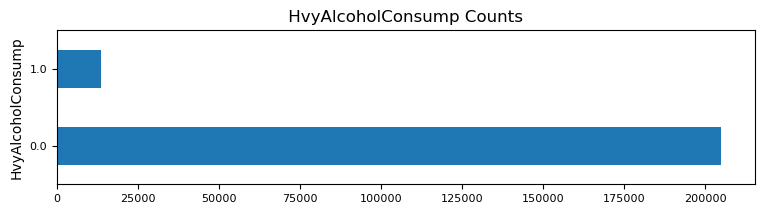

In [84]:
df_012['HvyAlcoholConsump'].value_counts().plot.barh(x='HvyAlcoholConsump', y='counts',
   title=" HvyAlcoholConsump Counts ",
     figsize = (9,2), 
     fontsize = 8,
);

In [85]:
##df_012['Diabetes_012'].value_counts()
NoDoc_df = df_012['NoDocbcCost'].value_counts()
NoDocp_df = round(df_012['NoDocbcCost'].value_counts()/len(df_012)*100,2)

NoDoc_df_overview = pd.DataFrame({"NoDocbcCost Count": NoDoc_df, "NoDocbcCost Count (%)":NoDocp_df})
NoDoc_df_overview.head(10)

,NoDocbcCost Count,NoDocbcCost Count (%)
NoDocbcCost,,
0.0,197294,90.26
1.0,21300,9.74


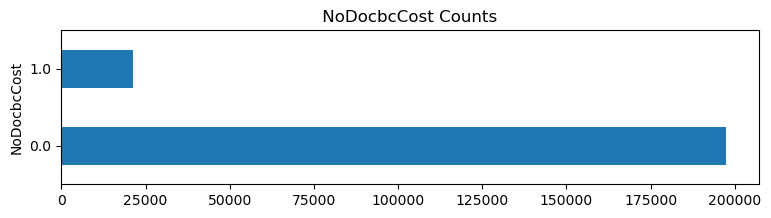

In [86]:
df_012['NoDocbcCost'].value_counts().plot.barh(x='NoDoccbcCost', y='counts',
   title=" NoDocbcCost Counts ",
     figsize = (9,2), 
     fontsize = 10,
);

In [87]:
Age_df = df_012['Age'].value_counts()
Agep_df = round(df_012['Age'].value_counts()/len(df_012)*100,2)
Agep_cumsum_df = np.cumsum(Agep_df)

Age_df_overview = pd.DataFrame({"Age Count": Age_df, "Age Count (%)":Agep_df, "Age Count Cum(%)":Agep_cumsum_df})
Age_df_overview#head(10)

,Age Count,Age Count (%),Age Count Cum(%)
Age,,,
9.0,28159,12.88,12.88
10.0,27617,12.63,25.51
8.0,25783,11.79,37.30
7.0,21871,10.01,47.31
11.0,21099,9.65,56.96
13.0,16357,7.48,64.44
6.0,16293,7.45,71.89
12.0,14939,6.83,78.72
5.0,13229,6.05,84.77


In [88]:
df_012['Age'].value_counts().sum()
df_012.shape

(218594, 22)

### Covariance and Correlations Calculations and Visualizations

In [89]:
# Calculating data Covariance
df_012_covariance_df = df_012.cov()
df_012_covariance_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,0.543471,0.095280,0.074088,0.011768,1.049510,0.015131,0.015121,0.038045,-0.031270,-0.006778,...,0.005072,0.003830,0.217263,0.288558,1.036166,0.059539,0.012006,0.426784,-0.072669,-0.211349
HighBP,0.095280,0.248732,0.069341,0.011602,0.643983,0.016846,0.012979,0.030737,-0.021681,-0.003307,...,0.006672,-0.000582,0.140013,0.118105,0.636405,0.041048,0.011155,0.524596,-0.052102,-0.135556
HighChol,0.074088,0.069341,0.247308,0.009754,0.288896,0.017258,0.009320,0.027005,-0.013151,-0.005494,...,0.006493,-0.000141,0.096611,0.181619,0.493051,0.026293,0.004921,0.402869,-0.022300,-0.057451
CholCheck,0.011768,0.011602,0.009754,0.040153,0.062508,-0.000249,0.001261,0.003278,-0.000726,0.001597,...,0.005324,-0.003122,0.014780,0.002491,0.082952,0.004215,-0.002548,0.060877,-0.002709,-0.001059
BMI,1.049510,0.643983,0.288896,0.062508,47.358124,-0.057917,0.010111,0.073281,-0.369505,-0.203134,...,-0.006645,0.082308,1.437895,3.324061,6.005041,0.480350,0.088314,-1.128935,-0.439048,-0.832060
Smoker,0.015131,0.016846,0.017258,-0.000249,-0.057917,0.249320,0.005518,0.015839,-0.013448,-0.014182,...,-0.001229,0.004921,0.067622,0.286699,0.438119,0.020476,0.024299,0.160550,-0.063851,-0.091618
Stroke,0.015121,0.012979,0.009320,0.001261,0.010111,0.005518,0.044800,0.012934,-0.005179,-0.000095,...,0.000788,0.001595,0.037411,0.096268,0.266364,0.013886,0.000437,0.085328,-0.012514,-0.049780
HeartDiseaseorAttack,0.038045,0.030737,0.027005,0.003278,0.073281,0.015839,0.012934,0.096174,-0.009285,-0.000349,...,0.002118,0.001615,0.079629,0.114278,0.471382,0.024316,0.014065,0.217849,-0.023459,-0.074991
PhysActivity,-0.031270,-0.021681,-0.013151,-0.000726,-0.369505,-0.013448,-0.005179,-0.009285,0.200808,0.026049,...,0.001906,-0.005189,-0.107530,-0.340466,-0.783675,-0.040370,0.007465,-0.122295,0.071462,0.143237
Fruits,-0.006778,-0.003307,-0.005494,0.001597,-0.203134,-0.014182,-0.000095,-0.000349,0.026049,0.239122,...,0.002177,-0.004029,-0.031156,-0.177549,-0.073677,-0.004373,-0.021086,0.114232,0.037973,0.043331


In [90]:
df_012_correlation_df = df_012.corr()
# Define a function to apply colors based on values on correlation_df
def color_negative_red(val):
    color = 'red' if val < 0.0000 else 'lime'
    return 'color: %s' % color

# Display the DataFrame with color-coded cells
df_012_corr_styled_df = df_012_correlation_df.style.map(color_negative_red)
df_012_corr_styled_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.259147,0.202088,0.079662,0.206872,0.041106,0.096906,0.166410,-0.094656,-0.018801,-0.036494,-0.071430,0.029780,0.017518,0.276671,0.049758,0.152588,0.203931,0.032824,0.186302,-0.098898,-0.136270
HighBP,0.259147,1.000000,0.279579,0.116096,0.187634,0.067646,0.122950,0.198731,-0.097013,-0.013558,-0.036974,-0.017509,0.057909,-0.003935,0.263553,0.030104,0.138531,0.207822,0.045081,0.338497,-0.104812,-0.129194
HighChol,0.202088,0.279579,1.000000,0.097882,0.084416,0.069503,0.088541,0.175106,-0.059012,-0.022591,-0.023758,-0.021545,0.056516,-0.000953,0.182378,0.046426,0.107634,0.133501,0.019945,0.260700,-0.044989,-0.054912
CholCheck,0.079662,0.116096,0.097882,1.000000,0.045329,-0.002492,0.029733,0.052746,-0.008082,0.016295,-0.003212,-0.020210,0.115005,-0.052529,0.069247,0.001580,0.044941,0.053115,-0.025627,0.097766,-0.013562,-0.002513
BMI,0.206872,0.187634,0.084416,0.045329,1.000000,-0.016855,0.006941,0.034337,-0.119821,-0.060364,-0.036880,-0.061758,-0.004180,0.040331,0.196153,0.061403,0.094732,0.176250,0.025866,-0.052792,-0.064009,-0.057471
Smoker,0.041106,0.067646,0.069503,-0.002492,-0.016855,1.000000,0.052207,0.102285,-0.060101,-0.058084,-0.009118,0.094693,-0.010653,0.033233,0.127138,0.072990,0.095256,0.103545,0.098087,0.103473,-0.128296,-0.087215
Stroke,0.096906,0.122950,0.088541,0.029733,0.006941,0.052207,1.000000,0.197047,-0.054606,-0.000920,-0.029330,-0.023298,0.016122,0.025413,0.165929,0.057818,0.136620,0.165659,0.004164,0.129733,-0.059318,-0.111791
HeartDiseaseorAttack,0.166410,0.198731,0.175106,0.052746,0.034337,0.102285,0.197047,1.000000,-0.066814,-0.002298,-0.022069,-0.038300,0.029562,0.017559,0.241051,0.046843,0.165014,0.197987,0.091413,0.226060,-0.075895,-0.114939
PhysActivity,-0.094656,-0.097013,-0.059012,-0.008082,-0.119821,-0.060101,-0.054606,-0.066814,1.000000,0.118874,0.127902,0.027755,0.018414,-0.039045,-0.225271,-0.096583,-0.189856,-0.227476,0.033575,-0.087824,0.159997,0.151934
Fruits,-0.018801,-0.013558,-0.022591,0.016295,-0.060364,-0.058084,-0.000920,-0.002298,0.118874,1.000000,0.238848,-0.026534,0.019268,-0.027781,-0.059814,-0.046156,-0.016357,-0.022583,-0.086914,0.075175,0.077910,0.042119


#### Visualization of Correlations with Heat Map 

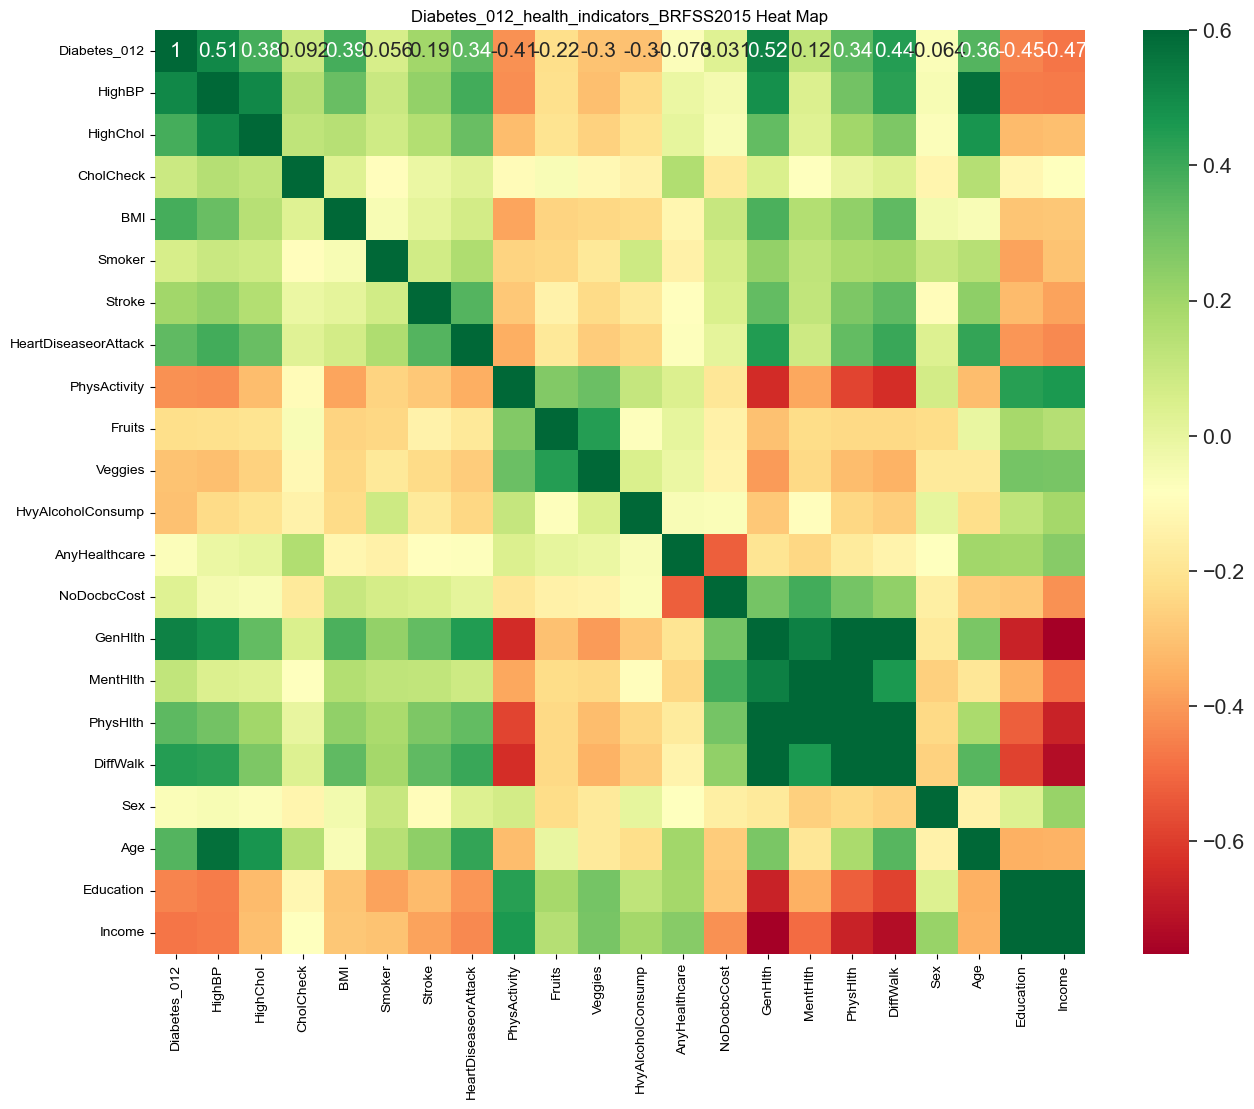

In [91]:
# Visualizing Diabetes_012 Dataset with HeatMap from Seaborn Library

plt.figure(figsize = (15, 12))
plt.title('Diabetes_012_health_indicators_BRFSS2015 Heat Map')
sns.set_theme(font_scale = 1.4)
sns.heatmap(df_012_correlation_df.corr(), cmap="RdYlGn", annot=True, annot_kws={"size": 15}, vmax=0.60)
plt.show()

##### Observations from Heatmap Analysis of Diabetes_012_Health Indicators
*
*
*


#

## Algo Modelling: Fix, Transform, PredicT

#### LOGISTIC REGRESSION MODELLING:

#### Splitting Data to Train and Test Sets with some X and y Explorations

In [92]:
# Create the labels set `y` and features DataFrame `X`

# Import Module
#from sklearn.model_selection import train_test_split

# Split training and testing sets
# Create the features DataFrame, X
X = df_012.copy()

## dropping the TARGET Column/Category from the dataset
X = X.drop(columns='Diabetes_012') 

# Create the target DataFrame, y ##Picking up the TARGET Category as y
y = df_012['Diabetes_012']

## using the train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [93]:
X.columns 
### Checking the columns. Diabetic_012 dropped

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [94]:
display(X_train.head())
display(X_train.tail())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
86971,0.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,4.0,1.0
50134,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0
47003,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,7.0
110887,1.0,0.0,1.0,27.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,5.0,5.0
243702,0.0,0.0,0.0,33.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,8.0


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
139620,1.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,2.0,0.0,1.0,5.0,6.0,8.0
121123,1.0,1.0,1.0,34.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,10.0,2.0,2.0
153969,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,7.0
171163,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,8.0,5.0,8.0
142010,1.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,2.0,0.0,1.0,10.0,6.0,8.0


In [95]:
display(X_test.head())
display(X_test.tail())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
63945,1.0,0.0,1.0,25.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
190298,1.0,1.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,7.0
125563,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,5.0,0.0,0.0,0.0,6.0,5.0,4.0
177748,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,4.0,20.0,0.0,0.0,0.0,7.0,4.0,1.0
29365,1.0,1.0,1.0,41.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,5.0,30.0,1.0,1.0,11.0,6.0,8.0


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
250991,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0
196853,1.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,2.0,30.0,0.0,0.0,0.0,11.0,4.0,5.0
159745,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,13.0,3.0,1.0
241345,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,4.0,3.0
192297,1.0,1.0,1.0,35.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,8.0,4.0,6.0


In [96]:
# feature_names = [['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
#        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
#        'Income']]

In [97]:
# Assign feature names to the model
# model.feature_names = feature_names

In [98]:
x_train_count= X_train.value_counts().sum()
x_test_count = X_test.value_counts().sum()
y_train_count= y_train.value_counts().sum()
y_test_count = y_test.value_counts().sum()

display(x_train_count)
display(y_train_count)
display(x_test_count)
display(y_test_count)

163945

163945

54649

54649

In [99]:
## Checking the count values 
display(y_train_count + x_test_count)

218594

In [100]:
## Train Test Data split check
print(f"Training Data Count: {x_train_count/len(df_012)*100:.2f}%")
print(f"Testing  Data Count: {x_test_count/len(df_012)*100:.2f}%")

Training Data Count: 75.00%
Testing  Data Count: 25.00%


In [101]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
86971,0.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,4.0,1.0
50134,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0
47003,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,7.0
110887,1.0,0.0,1.0,27.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,5.0,5.0
243702,0.0,0.0,0.0,33.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139620,1.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,2.0,0.0,1.0,5.0,6.0,8.0
121123,1.0,1.0,1.0,34.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,10.0,2.0,2.0
153969,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,7.0
171163,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,8.0,5.0,8.0


In [102]:
X_test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
63945,1.0,0.0,1.0,25.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
190298,1.0,1.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,7.0
125563,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,5.0,0.0,0.0,0.0,6.0,5.0,4.0
177748,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,4.0,20.0,0.0,0.0,0.0,7.0,4.0,1.0
29365,1.0,1.0,1.0,41.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,5.0,30.0,1.0,1.0,11.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250991,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0
196853,1.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,2.0,30.0,0.0,0.0,0.0,11.0,4.0,5.0
159745,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,13.0,3.0,1.0
241345,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,4.0,3.0


In [103]:
y_value = y.value_counts()

## Converting Value_Counts of Spams to Percentages
y_pcnt_df = round(y.value_counts()/len(y)*100,2)

#round(y_pcnt_df,2)
y_calculations = pd.DataFrame({
	"y_value Count": y_value, 
	"y_value count (%)": y_pcnt_df})

print(y_calculations)
print("\n..................\nApproximate Value Counts of Diabetes_012 by percent: 83% vs 15% vs 2% ")


              y_value Count  y_value count (%)
Diabetes_012                                  
0.0                  179100              81.93
2.0                   34867              15.95
1.0                    4627               2.12

..................
Approximate Value Counts of Diabetes_012 by percent: 83% vs 15% vs 2% 


In [104]:
y.shape

(218594,)

#### Scaling the Features

In [105]:
# Create the StandardScaler instance
#from sklearn.preprocessing import StandardScaler

# Fit the Standard Scaler with the training data
scaler = StandardScaler().fit(X_train, X_test)

# Scale the training data

In [106]:
#Scaling X Train data
x_train_scaled = scaler.transform(X_train)
x_train_scaled

array([[-0.92981616, -0.89997056,  0.20902286, ...,  1.57738446,
        -0.95238329, -2.28758486],
       [-0.92981616, -0.89997056,  0.20902286, ..., -1.96318687,
        -0.95238329, -0.86224927],
       [-0.92981616,  1.11114746,  0.20902286, ...,  0.6117741 ,
         1.05295283,  0.56308631],
       ...,
       [-0.92981616,  1.11114746,  0.20902286, ...,  0.6117741 ,
         1.05295283,  0.56308631],
       [-0.92981616, -0.89997056,  0.20902286, ..., -0.03196614,
         0.05028477,  1.03819817],
       [ 1.07548141, -0.89997056,  0.20902286, ...,  0.6117741 ,
         1.05295283,  1.03819817]])

In [107]:
#Scaling the X Test data
x_test_scaled = scaler.transform(X_test)
x_test_scaled

array([[ 1.07548141, -0.89997056,  0.20902286, ...,  1.57738446,
         0.05028477, -0.86224927],
       [ 1.07548141,  1.11114746,  0.20902286, ...,  0.6117741 ,
         1.05295283,  0.56308631],
       [ 1.07548141,  1.11114746,  0.20902286, ..., -0.67570638,
         0.05028477, -0.86224927],
       ...,
       [-0.92981616, -0.89997056,  0.20902286, ...,  1.57738446,
        -1.95505135, -2.28758486],
       [-0.92981616,  1.11114746,  0.20902286, ...,  1.25551434,
        -0.95238329, -1.33736114],
       [ 1.07548141,  1.11114746,  0.20902286, ..., -0.03196614,
        -0.95238329,  0.08797445]])

In [108]:
x_test_scaled_df = pd.DataFrame(x_test_scaled)
x_test_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.075481,-0.899971,0.209023,-0.555524,-0.950598,4.476926,-0.347585,0.620624,0.809108,0.520737,...,0.244628,-0.328517,0.335337,-0.467753,-0.533620,-0.492650,-0.882727,1.577384,0.050285,-0.862249
1,1.075481,1.111147,0.209023,-1.136874,-0.950598,-0.223368,-0.347585,-1.611283,0.809108,0.520737,...,0.244628,-0.328517,-0.602307,-0.467753,-0.533620,-0.492650,1.132853,0.611774,1.052953,0.563086
2,1.075481,1.111147,0.209023,-0.410186,1.051969,-0.223368,-0.347585,0.620624,0.809108,0.520737,...,0.244628,-0.328517,0.335337,0.167098,-0.533620,-0.492650,-0.882727,-0.675706,0.050285,-0.862249
3,-0.929816,1.111147,0.209023,1.624540,1.051969,-0.223368,-0.347585,-1.611283,0.809108,0.520737,...,0.244628,3.043979,1.272982,2.071649,-0.533620,-0.492650,-0.882727,-0.353836,-0.952383,-2.287585
4,1.075481,1.111147,0.209023,1.769877,1.051969,-0.223368,-0.347585,-1.611283,0.809108,0.520737,...,0.244628,-0.328517,1.272982,0.167098,2.712714,2.029838,1.132853,0.933644,1.052953,1.038198


In [109]:
x_train_scaled_df = pd.DataFrame(x_train_scaled)
x_train_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.929816,-0.899971,0.209023,-1.863562,-0.950598,-0.223368,-0.347585,-1.611283,-1.235928,-1.920354,...,-4.087833,-0.328517,0.335337,-0.467753,-0.53362,-0.49265,-0.882727,1.577384,-0.952383,-2.287585
1,-0.929816,-0.899971,0.209023,0.461839,-0.950598,-0.223368,-0.347585,0.620624,0.809108,0.520737,...,0.244628,3.043979,-1.539951,-0.467753,-0.53362,-0.49265,-0.882727,-1.963187,-0.952383,-0.862249
2,-0.929816,1.111147,0.209023,-0.410186,1.051969,-0.223368,-0.347585,0.620624,0.809108,-1.920354,...,0.244628,-0.328517,-0.602307,-0.467753,-0.53362,-0.49265,1.132853,0.611774,1.052953,0.563086
3,1.075481,-0.899971,0.209023,-0.264849,-0.950598,4.476926,-0.347585,0.620624,-1.235928,-1.920354,...,0.244628,-0.328517,0.335337,-0.467753,-0.53362,-0.49265,-0.882727,0.933644,0.050285,-0.387137
4,-0.929816,-0.899971,-4.784166,0.607177,1.051969,-0.223368,-0.347585,0.620624,-1.235928,0.520737,...,-4.087833,-0.328517,-0.602307,-0.467753,-0.53362,-0.49265,1.132853,-0.031966,-0.952383,1.038198


#### Creating and Fit a Logistic Regression Model: 

In [110]:
logistic_regression_model_012 = LogisticRegression(max_iter=100, random_state=4)

In [111]:
logistic_regression_model_012_feature_names = [[
       'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]

In [112]:
# Train a Logistic Regression model and print the model score
# logistic_regression_model_012 = LogisticRegression(max_iter=100, random_state=4)
# logistic_regression_model_012_feature_names = feature_names

# Fit the model
logistic_regression_model_012.fit(X_train, y_train)

c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=4)

In [113]:
# Make and save testing predictions with the saved logistic regression model using the test data
# Review the predictions

# Score the model
print(f"Training Data Score: {logistic_regression_model_012.score(X_train, y_train)*100:.2f}")
print(f"Testing Data Score:  {logistic_regression_model_012.score(X_test, y_test)*100:.2f}")

Training Data Score: 82.20
Testing Data Score:  81.77


In [114]:
### Overfitting Measure
lg_train_df = logistic_regression_model_012.score(X_train,y_train)
lg_test_df = logistic_regression_model_012.score(X_test, y_test)
lr_model_overfitting_df = (lg_train_df - lg_test_df)

# display(lr_model_overfitting_df)
# display(lr_model_overfitting_df*100)
print(f"Logistic Model Train_Test OverFitting Score:  {lr_model_overfitting_df*100:.2f}%\n")

Logistic Model Train_Test OverFitting Score:  0.42%



#### Predicting and Evaluation of Logistic Regression

In [115]:
# Generate predictions from the model we just fit
predictions = logistic_regression_model_012.predict(X_train)

# Convert those predictions (and actual values) to a DataFrame
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_train})
results_df.head()

,Prediction,Actual
86971,0.0,0.0
50134,0.0,0.0
47003,0.0,0.0
110887,0.0,0.0
243702,0.0,0.0


In [116]:
# Apply the fitted model to the `test` dataset
test_predictions = logistic_regression_model_012.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions":test_predictions, 
    "Testing Data Actual Targets": y_test})
results_df.head(3)

,Testing Data Predictions,Testing Data Actual Targets
63945,0.0,0.0
190298,0.0,0.0
125563,0.0,0.0


In [117]:
lr_train_df_50s = logistic_regression_model_012.score(X_train,y_train)
lr_test_df_50s  = logistic_regression_model_012.score(X_test, y_test)
lr_ovelrit_50s  = (lr_train_df_50s - lr_test_df_50s)

print(f"lr Training Data Score:   {lr_train_df_50s*100:.2f}%")
print(f"lr Testing Data Score:    {lr_test_df_50s*100:.2f}%")
print(f"lr (Train-Test) Ovelrit:  {lr_ovelrit_50s*100:.2f}%")

lr Training Data Score:   82.20%
lr Testing Data Score:    81.77%
lr (Train-Test) Ovelrit:  0.42%


In [118]:
## Calculating Accyracy scores
lr_accuracy_df = accuracy_score(y_test, test_predictions)*100
print(f"Logistic Regression Prediction Accuracy: {lr_accuracy_df:.2f}%")

Logistic Regression Prediction Accuracy: 81.77%


In [119]:
# #confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, test_predictions, labels = [0,1,2]))

[[43468     0  1112]
 [ 1140     0    85]
 [ 7623     0  1221]]


In [120]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions, zero_division=1, labels = [0,1,2]))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     44580
           1       1.00      0.00      0.00      1225
           2       0.50      0.14      0.22      8844

    accuracy                           0.82     54649
   macro avg       0.78      0.37      0.37     54649
weighted avg       0.78      0.82      0.77     54649



In [121]:
# # Calculate the balanced accuracy score
# #print(balanced_accuracy_score(y_test, test_predictions))
# # Calculate the balanced accuracy score
# balance_score_df = balanced_accuracy_score(y_test, test_predictions)
# balance_acc_score_df =print(f"Balance Accuracy Score for Diabetes_012: {balance_score_df*100:.2f}%")
# balance_acc_score_df

In [122]:
# Predict values with probabilities
pred_probas = logistic_regression_model_012.predict_proba(X)

# Print the probabilities
pred_probas

array([[0.41429999, 0.0348366 , 0.55086341],
       [0.80555102, 0.0249433 , 0.16950568],
       [0.64015502, 0.0372181 , 0.32262688],
       ...,
       [0.96048271, 0.01275946, 0.02675784],
       [0.80964358, 0.02410667, 0.16624975],
       [0.75631766, 0.03371459, 0.20996775]])

In [123]:
# Each prediction includes a prediction for both the 0 class and the 1 class
# We only need the predictions for the 1 class; use a list comprehension to 
# gather the second value from each list

pred_probas_firsts = [prob[1] for prob in pred_probas]

# Print the first 5 probabilities
pred_probas_firsts[0:5]

[0.03483659647269595,
 0.02494329528369335,
 0.03721810161502467,
 0.04217572229802025,
 0.03582230880455646]

##

#### RANDOM FOREST CLASSIFIER MODELLING for Diabetes_012
* Creating and Fitting a Random Forest Classifier Model.
* Random forest is Ensemble Algorithm that can be used for both classification and regression modelling. it can also be used where there are missing values problem or categorical values in dataset.
* This is to create a Random Forest Classifier model, fit it to training data, make predictions with the testing data, and print the model's accuracy score. 


In [124]:
#from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=1000, max_depth=5, min_samples_split=4, random_state=4)
#random_forest_model.fit(X_train, y_train)
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Fit the Standard Scaler with the training data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train

# Transforming the test dataset based on the fit from the training dataset
X_test = scaler.transform(X_test)
X_test
# Fit the model
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=1000,
                       random_state=4)

In [125]:
X_train_copy

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
86971,0.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,4.0,1.0
50134,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0
47003,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,7.0
110887,1.0,0.0,1.0,27.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,5.0,5.0
243702,0.0,0.0,0.0,33.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139620,1.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,2.0,0.0,1.0,5.0,6.0,8.0
121123,1.0,1.0,1.0,34.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,10.0,2.0,2.0
153969,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,7.0
171163,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,8.0,5.0,8.0


In [127]:
X_train

array([[-0.92981616, -0.89997056,  0.20902286, ...,  1.57738446,
        -0.95238329, -2.28758486],
       [-0.92981616, -0.89997056,  0.20902286, ..., -1.96318687,
        -0.95238329, -0.86224927],
       [-0.92981616,  1.11114746,  0.20902286, ...,  0.6117741 ,
         1.05295283,  0.56308631],
       ...,
       [-0.92981616,  1.11114746,  0.20902286, ...,  0.6117741 ,
         1.05295283,  0.56308631],
       [-0.92981616, -0.89997056,  0.20902286, ..., -0.03196614,
         0.05028477,  1.03819817],
       [ 1.07548141, -0.89997056,  0.20902286, ...,  0.6117741 ,
         1.05295283,  1.03819817]])

In [128]:
X_test

array([[ 1.07548141, -0.89997056,  0.20902286, ...,  1.57738446,
         0.05028477, -0.86224927],
       [ 1.07548141,  1.11114746,  0.20902286, ...,  0.6117741 ,
         1.05295283,  0.56308631],
       [ 1.07548141,  1.11114746,  0.20902286, ..., -0.67570638,
         0.05028477, -0.86224927],
       ...,
       [-0.92981616, -0.89997056,  0.20902286, ...,  1.57738446,
        -1.95505135, -2.28758486],
       [-0.92981616,  1.11114746,  0.20902286, ...,  1.25551434,
        -0.95238329, -1.33736114],
       [ 1.07548141,  1.11114746,  0.20902286, ..., -0.03196614,
        -0.95238329,  0.08797445]])

In [129]:
print(f"RF Training Data Score: {random_forest_model.score(X_train, y_train)}")
print(f"RF Testing Data Score:  {random_forest_model.score(X_test, y_test)}")

print(f"RF Training Data Score: {random_forest_model.score(X_train,y_train)*100:.2f}%")
print(f"RF Testing Data Score:  {random_forest_model.score(X_test, y_test)*100:.2f} %")

RF Training Data Score: 0.8227454329195767
RF Testing Data Score:  0.8177459788834196
RF Training Data Score: 82.27%
RF Testing Data Score:  81.77 %


In [130]:
### Overfitting calculation for RandomforestClassifier
rf_model_overfitting_df = (random_forest_model.score(X_train, y_train))-(random_forest_model.score(X_test, y_test))

#round(rf_model_overfitting_df*100,2)
print(f"Random Forest Train_Test OverFitting: {rf_model_overfitting_df*100:.2f}%")

Random Forest Train_Test OverFitting: 0.50%


#### Calculating Predictions and Accuracy Scores for Random Forest for Diabetes_012 Dataset

In [131]:
# Generate predictions from the model we just fit
rf_predictions = random_forest_model.predict(X_train)

# Convert those predictions (and actual values) to a DataFrame
results_df = pd.DataFrame({"Prediction": rf_predictions, "Actual": y_train})
results_df.head(10)

,Prediction,Actual
86971,0.0,0.0
50134,0.0,0.0
47003,0.0,0.0
110887,0.0,0.0
243702,0.0,0.0
112315,0.0,1.0
237931,0.0,0.0
156431,0.0,0.0
217073,0.0,0.0
170332,0.0,0.0


In [132]:
# Apply the fitted model to the `test` dataset
testing_predictions = random_forest_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})
results_df.head()

,Testing Data Predictions,Testing Data Actual Targets
63945,0.0,0.0
190298,0.0,0.0
125563,0.0,0.0
177748,0.0,0.0
29365,0.0,2.0


In [133]:
#Import the accuracy_score function
#from sklearn.metrics import accuracy_score

# Calculate the model's accuracy on the test dataset
random_forest_df = accuracy_score(y_test, testing_predictions)*100 
#random_forest_df 
print(f"Random Forest Accuracy Score: {random_forest_df:.2f}%")

Random Forest Accuracy Score: 81.77%


In [134]:
rf_train_012 = random_forest_model.score(X_train,y_train)
rf_test_012 = random_forest_model.score(X_test, y_test)
rf_overfit_012 = (rf_train_012 - rf_test_012)

print(f"rf Training Data Score:   {rf_train_012*100:.2f}%")
print(f"rf Testing Data Score:    {rf_test_012*100:.2f}%")
print(f"rf (Train-Test) OverFit:  {rf_overfit_012*100:.2f}%")

rf Training Data Score:   82.27%
rf Testing Data Score:    81.77%
rf (Train-Test) OverFit:  0.50%


In [135]:
# X_train

In [136]:
# importances = pd.DataFrame({'feature': (X_train_copy_columns), 'importance': np.round(random_forest_model.feature_importances_,3)})
# importances = importances.sort_values('importance', ascending=False).set_index('feature')
# importances * 100

In [137]:
# importances = pd.DataFrame({'feature': (X_train_copy.columns), 'importance': np.round(random_forest_model.feature_importances_,3)})
# importances = importances.sort_values('importance', ascending=False).set_index('feature')
# importances * 100

#### Calculating Confusion Matrix for Random Forest (Diabetes_012)

In [138]:
# #confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, testing_predictions))

[[44489     0    91]
 [ 1216     0     9]
 [ 8644     0   200]]


In [139]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, testing_predictions)) #, labels = [0,1,2]))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     44580
         1.0       0.00      0.00      0.00      1225
         2.0       0.67      0.02      0.04      8844

    accuracy                           0.82     54649
   macro avg       0.50      0.34      0.31     54649
weighted avg       0.78      0.82      0.74     54649



c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [140]:
# Calculate the balanced accuracy score
balance_score_df = balanced_accuracy_score(y_test, testing_predictions)
balance_acc_score_df =print(f"Balance Accuracy Score: {balance_score_df*100:.2f}%")
balance_acc_score_df

Balance Accuracy Score: 34.02%


In [141]:
# Predict values with probabilities
pred_probas = random_forest_model.predict_proba(X)

# Print the probabilities
pred_probas

c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([[0.53046498, 0.03590572, 0.43362931],
       [0.79672965, 0.02332429, 0.17994606],
       [0.53012324, 0.03594703, 0.43392972],
       ...,
       [0.7989278 , 0.02340545, 0.17766675],
       [0.68834872, 0.0285428 , 0.28310848],
       [0.60863007, 0.03391163, 0.35745829]])

In [142]:
# Each prediction includes a prediction for both the 0 class and the 1 class
# We only need the predictions for the 1 class; use a list comprehension to 
# gather the second value from each list

pred_probas_firsts = [prob[1] for prob in pred_probas]

# Print the first 5 probabilities
pred_probas_firsts[0:5]

[0.035905715210131625,
 0.02332428542856138,
 0.03594703405468798,
 0.02861904357852857,
 0.03400679699580179]

In [143]:
# Calculate the roc_auc_score
# roc_df = roc_auc_score(y_test, pred_probas_firsts)
# roc_df

### Observations and Inferences for Analysis of Diabetes_012 Dataset:
*
*
*
*

### **End of Analysis for Diabetes_012**

##

## **DIABETES_BINARY_5050Splits DATASET ANALYSIS** 

### EDA for diabetes_Binary_5050split_Health_Indicators_BRFSS2015

In [144]:
df_50s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67889 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       67889 non-null  float64
 1   HighBP                67889 non-null  float64
 2   HighChol              67889 non-null  float64
 3   CholCheck             67889 non-null  float64
 4   BMI                   67889 non-null  float64
 5   Smoker                67889 non-null  float64
 6   Stroke                67889 non-null  float64
 7   HeartDiseaseorAttack  67889 non-null  float64
 8   PhysActivity          67889 non-null  float64
 9   Fruits                67889 non-null  float64
 10  Veggies               67889 non-null  float64
 11  HvyAlcoholConsump     67889 non-null  float64
 12  AnyHealthcare         67889 non-null  float64
 13  NoDocbcCost           67889 non-null  float64
 14  GenHlth               67889 non-null  float64
 15  MentHlth              67

In [145]:
round(df_50s.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,67889.0,0.51,0.50,0.0,0.0,1.0,1.0,1.0
HighBP,67889.0,0.58,0.49,0.0,0.0,1.0,1.0,1.0
HighChol,67889.0,0.53,0.50,0.0,0.0,1.0,1.0,1.0
CholCheck,67889.0,0.97,0.16,0.0,1.0,1.0,1.0,1.0
BMI,67889.0,30.02,7.18,12.0,25.0,29.0,33.0,98.0
Smoker,67889.0,0.49,0.50,0.0,0.0,0.0,1.0,1.0
Stroke,67889.0,0.06,0.25,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,67889.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
PhysActivity,67889.0,0.69,0.46,0.0,0.0,1.0,1.0,1.0
Fruits,67889.0,0.60,0.49,0.0,0.0,1.0,1.0,1.0


#### Dataset Analysis with GroupBy function

In [146]:
df_50s_vc = df_50s.groupby(["Diabetes_binary"])[["BMI","PhysHlth","MentHlth","Age","Income","Education","GenHlth"]].value_counts()
df_50s_vc

Diabetes_binary  BMI   PhysHlth  MentHlth  Age   Income  Education  GenHlth
0.0              27.0  0.0       0.0       10.0  8.0     6.0        2.0        24
                                           11.0  8.0     6.0        2.0        23
                 26.0  0.0       0.0       10.0  8.0     6.0        2.0        22
                 24.0  0.0       0.0       8.0   8.0     6.0        2.0        21
                 23.0  0.0       0.0       9.0   8.0     6.0        2.0        20
                                                                               ..
1.0              92.0  30.0      30.0      4.0   1.0     6.0        5.0         1
                 95.0  30.0      15.0      8.0   7.0     3.0        3.0         1
                 98.0  0.0       2.0       10.0  7.0     6.0        3.0         1
                       10.0      15.0      11.0  6.0     5.0        4.0         1
                       30.0      30.0      8.0   5.0     6.0        5.0         1
Name: count, Length: 5

In [147]:
df_50s_grps = df_50s.groupby(["Diabetes_binary"])[["BMI","PhysHlth","MentHlth","Age","Income","Education","GenHlth"]].count()
df_50s_grps

,BMI,PhysHlth,MentHlth,Age,Income,Education,GenHlth
Diabetes_binary,,,,,,,
0.0,33022,33022,33022,33022,33022,33022,33022
1.0,34867,34867,34867,34867,34867,34867,34867


In [148]:
df_50s.groupby(["Diabetes_binary"])['BMI'].value_counts()

Diabetes_binary  BMI 
0.0              27.0    3278
                 26.0    2720
                 24.0    2590
                 25.0    2356
                 23.0    2170
                         ... 
1.0              78.0       1
                 80.0       1
                 83.0       1
                 85.0       1
                 95.0       1
Name: count, Length: 150, dtype: int64

#### Visualizing Density Graphs with histplot from Seaborn Library

c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

<Axes: xlabel='MentHlth', ylabel='Count'>

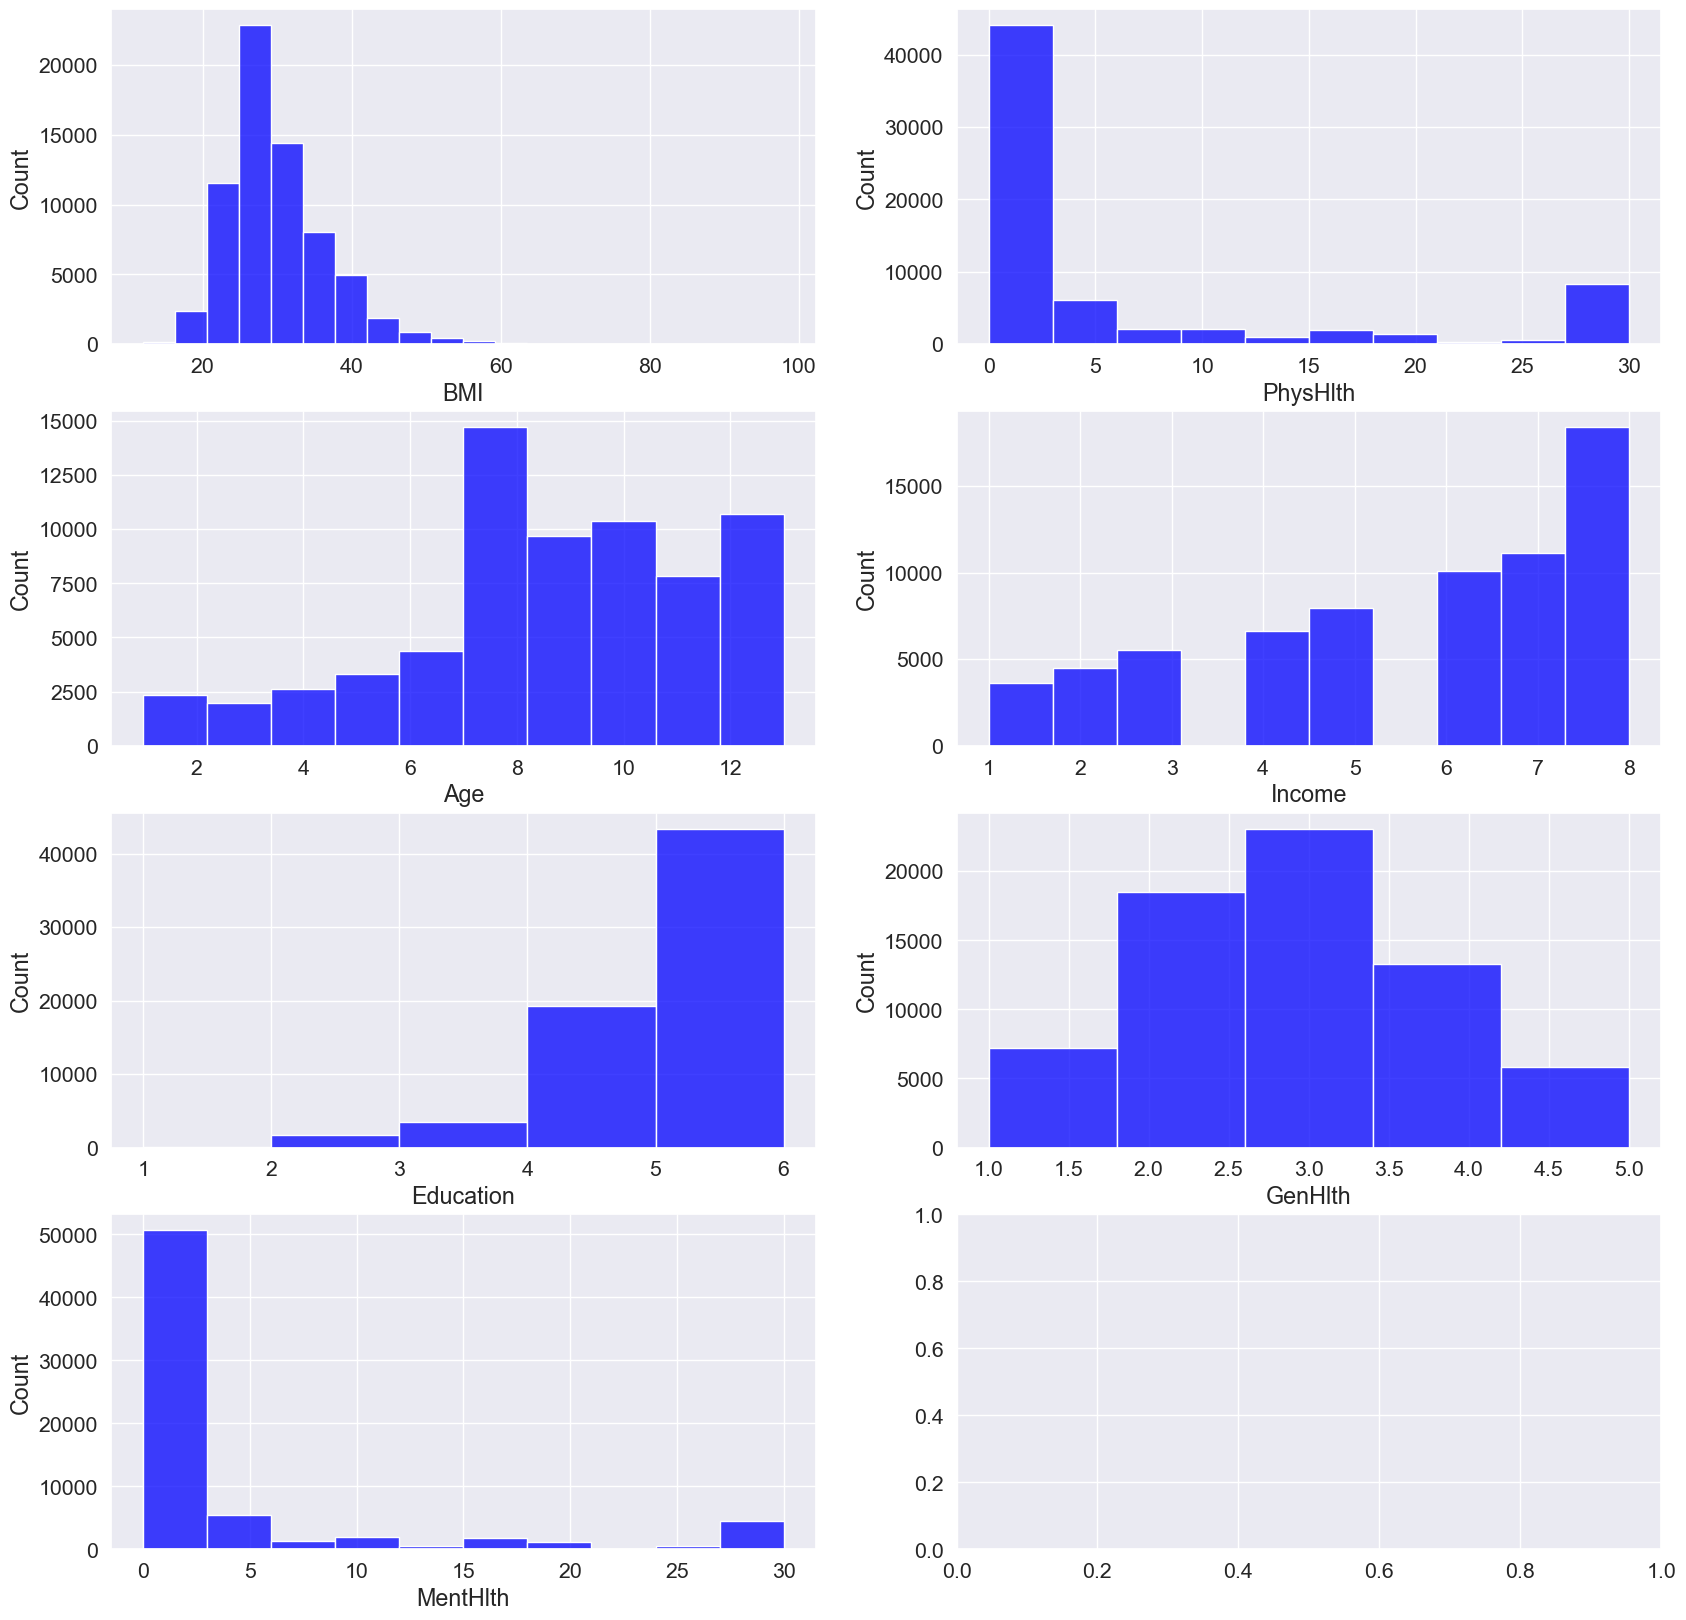

In [149]:
# Visualizing Density Graphs with histplot from Seaborn Library
# 3*2=6, # # columns=2 figure, # # having 2 row
# [0,0], [0,1], # # [1,0], [1,1], # # [2,0], [2,1], 
# Convert infinite values to NaN
#df_50s.replace([np.inf, -np.inf], np.nan, inplace=True)

fig,ax = plt.subplots(4,2, figsize=(20,20))

#pd.option_context('mode.use_inf_as_na', True):
#sns.histplot(df_50s)
sns.histplot(df_50s.BMI, bins=20, ax=ax[0,0], color="blue")
sns.histplot(df_50s.PhysHlth, bins=10,  ax=ax[0,1], color="blue")
sns.histplot(df_50s.Age, bins=10,       ax=ax[1,0], color="blue")
sns.histplot(df_50s.Income, bins=10,    ax=ax[1,1], color="blue")
sns.histplot(df_50s.Education, bins=5,  ax=ax[2,0], color="blue")
sns.histplot(df_50s.GenHlth, bins=5,    ax=ax[2,1], color="blue")
sns.histplot(df_50s.MentHlth, bins=10,  ax=ax[3,0], color="blue")
#sns.histplot(df_50s.Diabetes_binary, bins=10, ax=ax[3.1], color="blue");

#### Visualizing Dataset with pairplots of histplot from Seaborn Library

In [150]:
#df_50s_new = df_50s[['Diabetes_binary','GenHlth','Education','Income','Age','MentHlth', 'PhysHlth','BMI']]
df_50s_new = df_50s[['GenHlth','Education','Income','Age','MentHlth', 'PhysHlth','BMI']]
df_50s_new = df_50s[['Age','MentHlth', 'PhysHlth','BMI']]
df_50s_new.head(5)

,Age,MentHlth,PhysHlth,BMI
0,4.0,5.0,30.0,26.0
1,12.0,0.0,0.0,26.0
2,13.0,0.0,10.0,26.0
3,11.0,0.0,3.0,28.0
5,1.0,7.0,0.0,18.0


c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

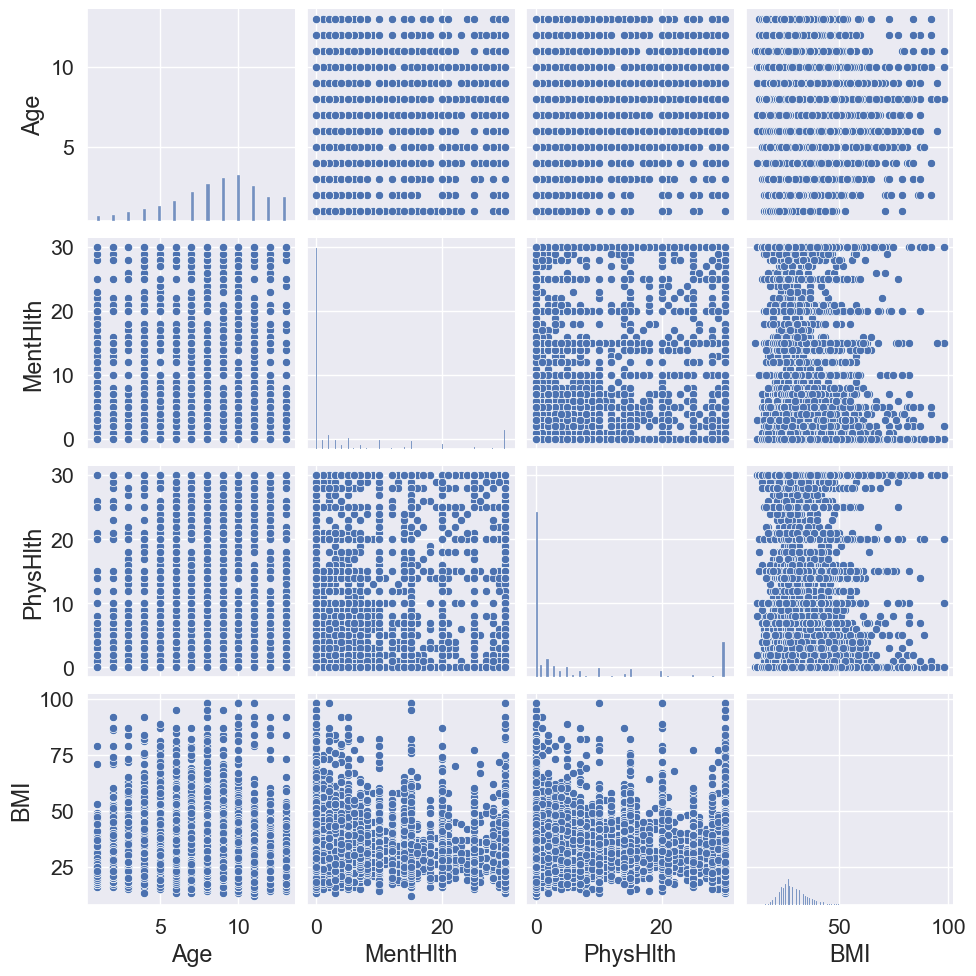

In [151]:
#df_50s.replace([np.inf, -np.inf], np.nan, inplace=True) >> Attempts to fix warining messages
#df_50s.replace([np.inf, -np.inf], np.nan, inplace=True):
sns.pairplot(df_50s_new);

### Visualizing Dataset with subplot from Maplotlib

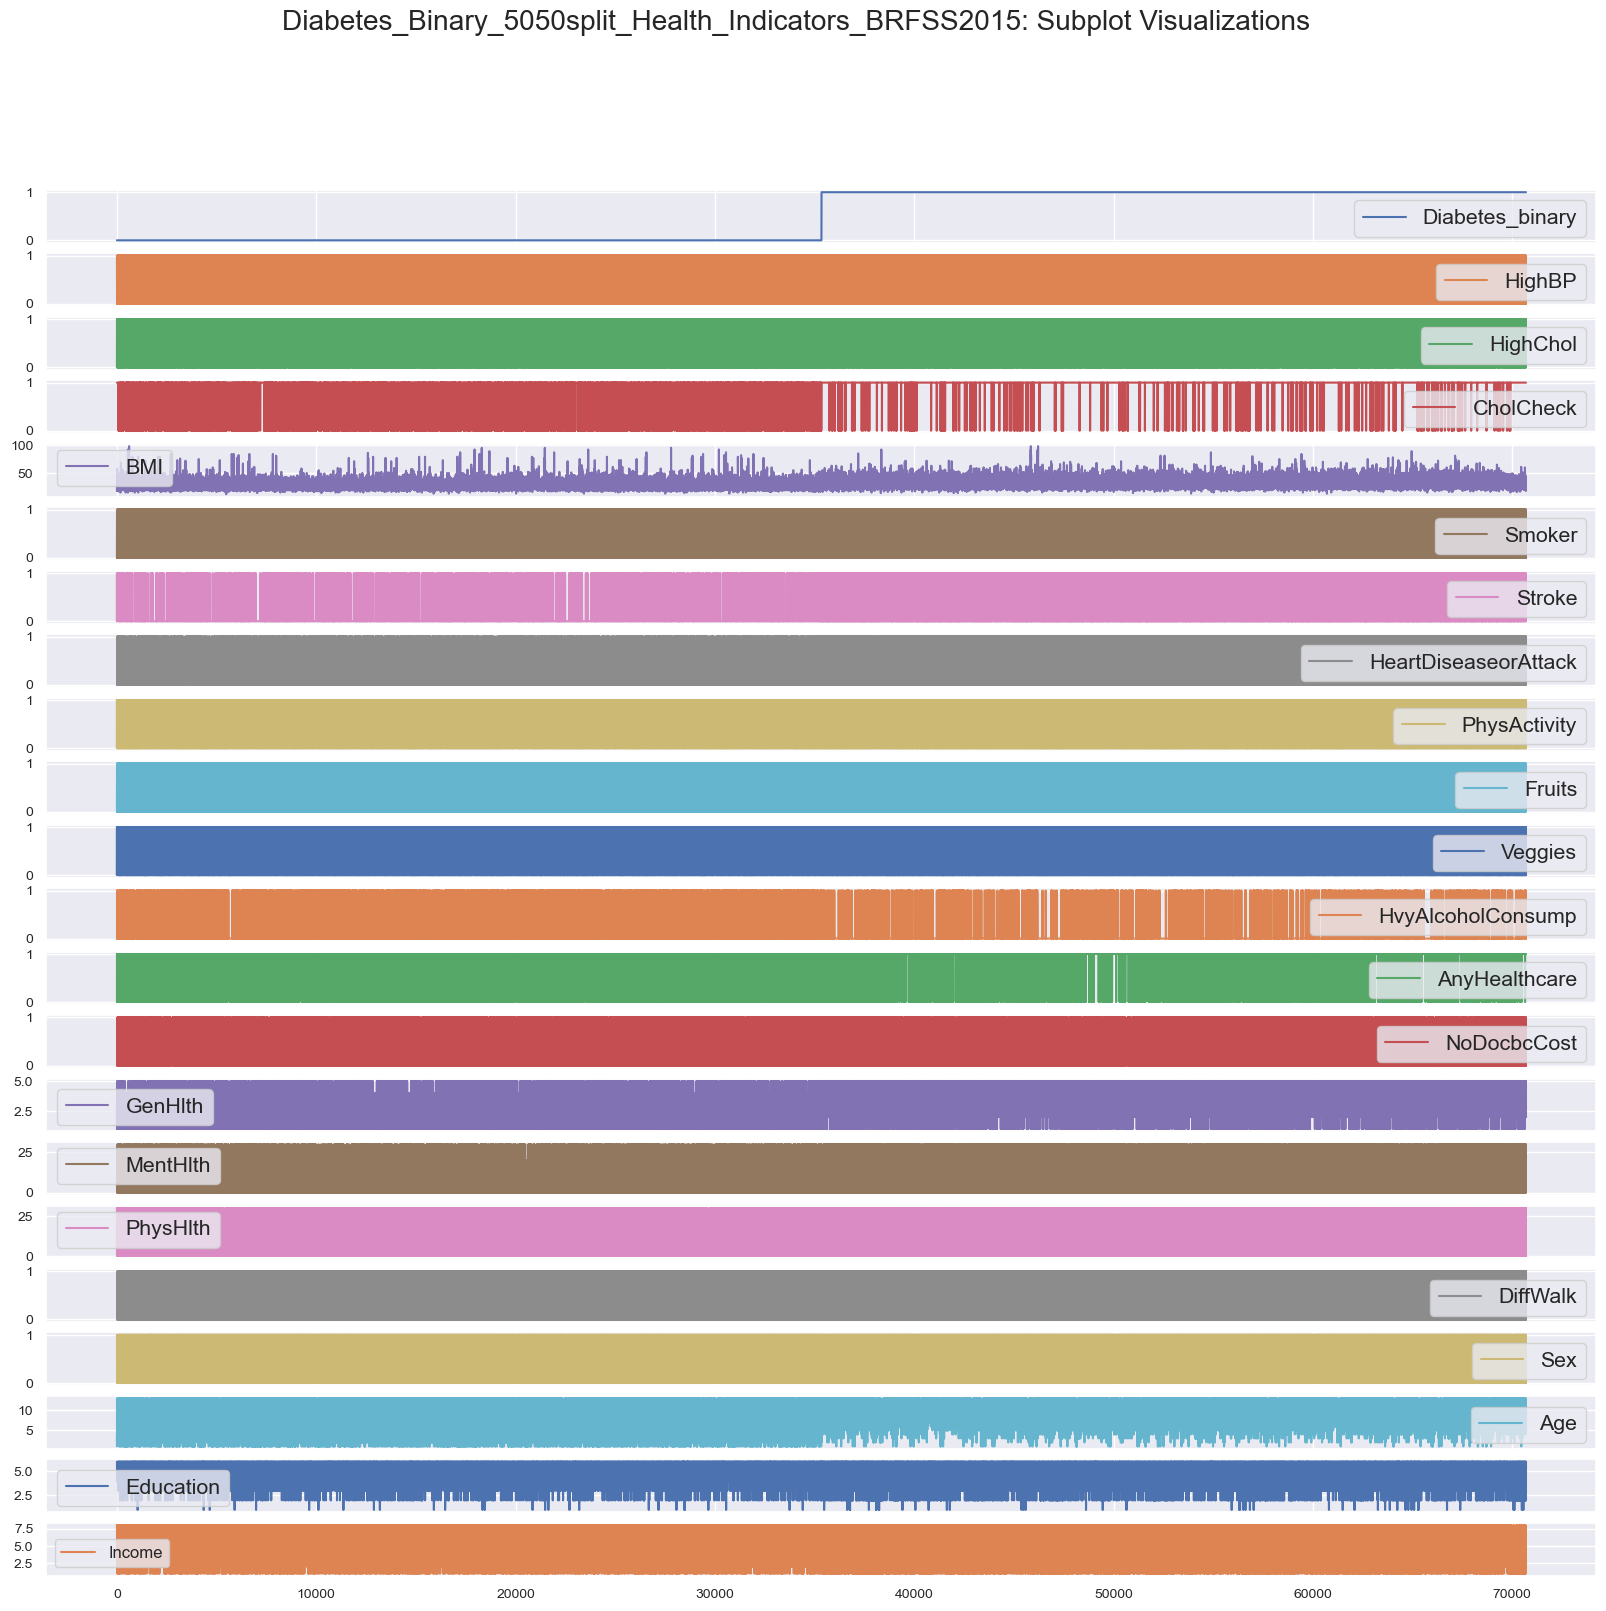

In [152]:
df_50s.plot(title="Diabetes_Binary_5050split_Health_Indicators_BRFSS2015: Subplot Visualizations",
    figsize = (20,18), 
    fontsize = 10,
    subplots=True
    )
plt.legend(fontsize = 12)
plt.show()

### Looking for Correlations Among Features

In [153]:
## Calculation for correlations for the variables 
df_50s_correlation_df = df_50s.corr()
# Define a function to apply colors based on values on correlation_df
def color_negative_red(val):
    color = 'red' if val < 0.0000 else 'lime'
    return 'color: %s' % color

# Display the DataFrame with color-coded cells
df_50s_corr_styled_df = df_50s_correlation_df.style.map(color_negative_red)
df_50s_corr_styled_df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.366135,0.276855,0.121217,0.280983,0.069877,0.121060,0.204512,-0.144819,-0.038830,-0.067652,-0.101175,0.029593,0.032969,0.389457,0.076583,0.203004,0.263647,0.041407,0.272291,-0.151192,-0.205602
HighBP,0.366135,1.000000,0.304825,0.108636,0.227307,0.073083,0.125658,0.204301,-0.123574,-0.026696,-0.055717,-0.031291,0.042154,0.018840,0.301278,0.054343,0.164218,0.226726,0.036005,0.331322,-0.123326,-0.169724
HighChol,0.276855,0.304825,1.000000,0.089473,0.119993,0.083088,0.097439,0.176532,-0.081199,-0.037566,-0.035092,-0.028083,0.036011,0.028187,0.222194,0.077871,0.136086,0.155773,0.010690,0.233290,-0.070800,-0.093962
CholCheck,0.121217,0.108636,0.089473,1.000000,0.049059,-0.002069,0.023966,0.045682,-0.011308,0.014898,-0.001970,-0.026702,0.106440,-0.061526,0.065610,-0.008465,0.037790,0.047840,-0.008433,0.104374,-0.012919,0.003464
BMI,0.280983,0.227307,0.119993,0.049059,1.000000,-0.002276,0.017218,0.052117,-0.159836,-0.072396,-0.046034,-0.062313,-0.008618,0.059218,0.249614,0.095720,0.151608,0.237130,-0.004669,-0.048545,-0.082147,-0.106625
Smoker,0.069877,0.073083,0.083088,-0.002069,-0.002276,1.000000,0.060314,0.118116,-0.067801,-0.064615,-0.020006,0.075609,-0.008537,0.029445,0.133821,0.083375,0.111098,0.109995,0.114733,0.096651,-0.124795,-0.087454
Stroke,0.121060,0.125658,0.097439,0.023966,0.017218,0.060314,1.000000,0.221221,-0.074441,-0.003704,-0.042891,-0.025285,0.008779,0.032891,0.184474,0.082932,0.159850,0.187824,0.004662,0.123330,-0.066575,-0.129807
HeartDiseaseorAttack,0.204512,0.204301,0.176532,0.045682,0.052117,0.118116,0.221221,1.000000,-0.090957,-0.012171,-0.029600,-0.039840,0.018959,0.031549,0.268617,0.069075,0.192662,0.226871,0.099827,0.220407,-0.086427,-0.136689
PhysActivity,-0.144819,-0.123574,-0.081199,-0.011308,-0.159836,-0.067801,-0.074441,-0.090957,1.000000,0.123665,0.139162,0.023357,0.022055,-0.056005,-0.257723,-0.120512,-0.223856,-0.266721,0.051667,-0.095929,0.173087,0.178633
Fruits,-0.038830,-0.026696,-0.037566,0.014898,-0.072396,-0.064615,-0.003704,-0.012171,0.123665,1.000000,0.231924,-0.030515,0.025407,-0.039851,-0.079655,-0.053725,-0.037398,-0.039559,-0.087669,0.068452,0.083663,0.062142


### Visualizing Diabetes_5050Split Dataset with HeatMap from Seaborn Library

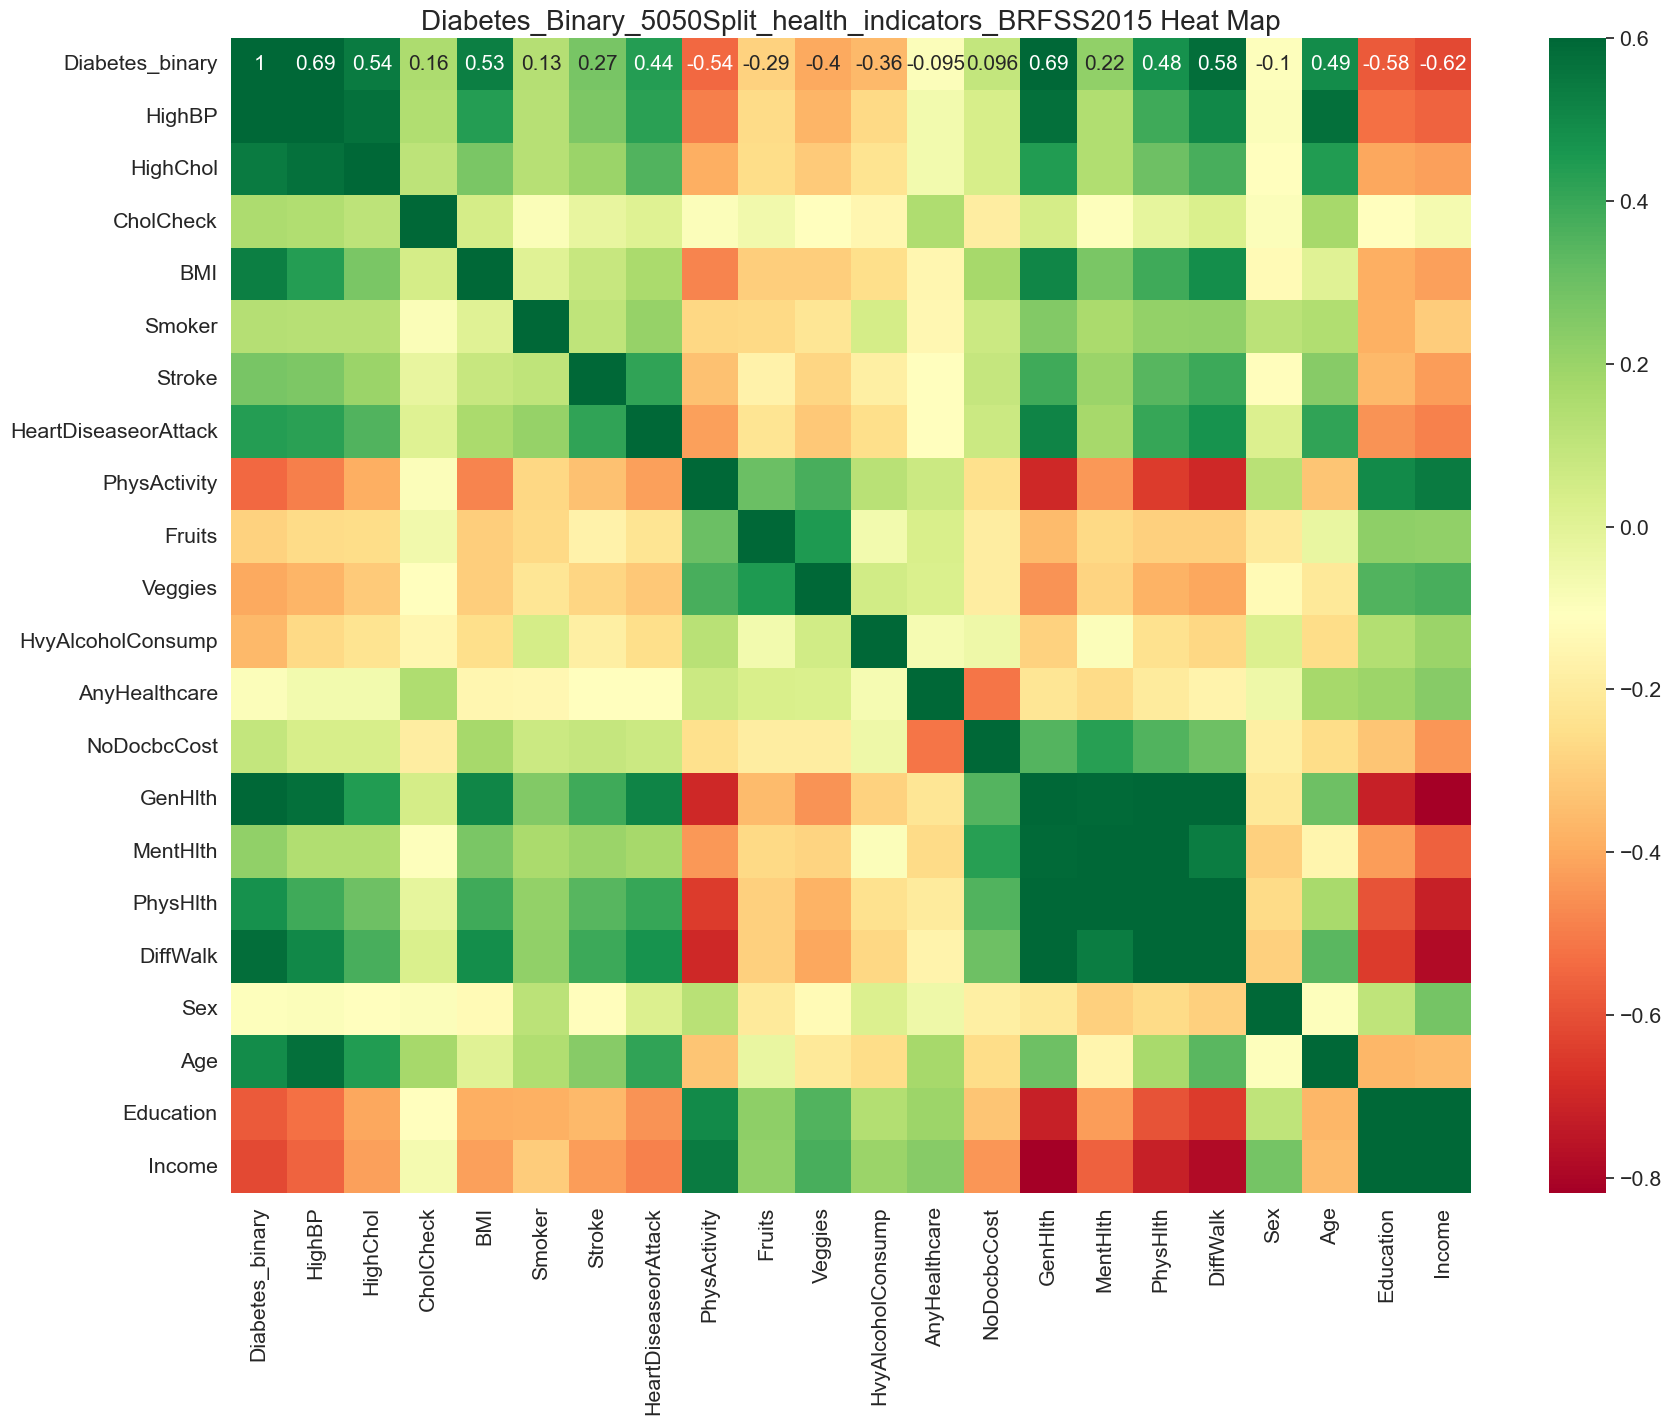

In [154]:
# Visualizing Diabetes_012 Dataset with HeatMap from Seaborn Library

plt.figure(figsize = (20, 15))
plt.title('Diabetes_Binary_5050Split_health_indicators_BRFSS2015 Heat Map',fontsize=20)
sns.set_theme(font_scale = 1.4)
sns.heatmap(df_50s_correlation_df.corr(), cmap="RdYlGn", annot=True, annot_kws={"size": 15}, vmax=0.60)
plt.show()

###

### Exploring Correlations of Target Feature (Diabetes_Binary) With Other Features

In [155]:
## Sorting the Values of Diabetes Binary (Target Feature) vs other Features
df_50s.corr()['Diabetes_binary'].sort_values()

Income                 -0.205602
Education              -0.151192
PhysActivity           -0.144819
HvyAlcoholConsump      -0.101175
Veggies                -0.067652
Fruits                 -0.038830
AnyHealthcare           0.029593
NoDocbcCost             0.032969
Sex                     0.041407
Smoker                  0.069877
MentHlth                0.076583
Stroke                  0.121060
CholCheck               0.121217
PhysHlth                0.203004
HeartDiseaseorAttack    0.204512
DiffWalk                0.263647
Age                     0.272291
HighChol                0.276855
BMI                     0.280983
HighBP                  0.366135
GenHlth                 0.389457
Diabetes_binary         1.000000
Name: Diabetes_binary, dtype: float64

<Axes: >

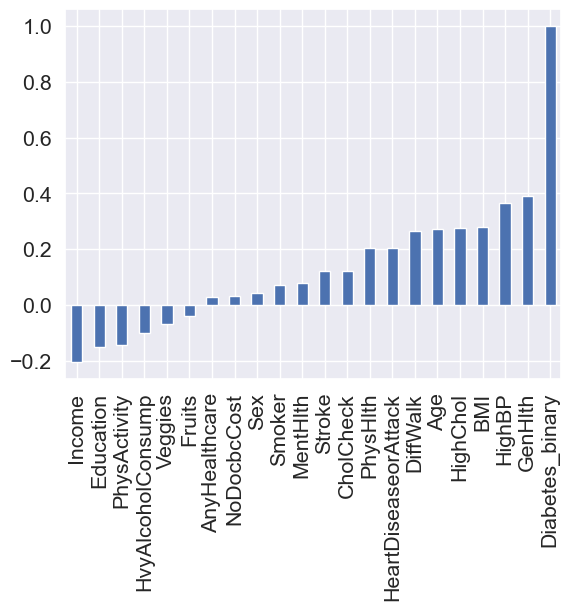

In [156]:
df_50s.corr()['Diabetes_binary'].sort_values().plot(kind='bar')

### Calculating the Relative Importances of the Features for Diabetes_50s

In [157]:
#df_50s_new = df_50s[['Diabetes_binary','GenHlth','Education','Income','Age','MentHlth', 'PhysHlth','BMI']]
df_50s_new = df_50s[['GenHlth','Education','Income','Age','MentHlth', 'PhysHlth','BMI']]
df_50s_new = df_50s[['Age','MentHlth', 'PhysHlth','BMI']]
df_50s_new.head(5)

,Age,MentHlth,PhysHlth,BMI
0,4.0,5.0,30.0,26.0
1,12.0,0.0,0.0,26.0
2,13.0,0.0,10.0,26.0
3,11.0,0.0,3.0,28.0
5,1.0,7.0,0.0,18.0


## **MODELLING for Diabetics_5050Split Dataset (df_50s)**

### df_50s Dataset: **Train, Test, Split**

In [158]:
# Split training and testing sets
# Create the features DataFrame, X
X = df_50s.copy()
X = X.drop(columns='Diabetes_binary')

# Create the target DataFrame, y
y = df_50s['Diabetes_binary']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train


array([[-1.16364156,  0.93582779,  0.16129201, ...,  1.53203311,
        -0.86456882,  0.63345025],
       [-1.16364156, -1.06857267, -6.19993503, ..., -1.95804531,
         1.08155669,  1.09319898],
       [ 0.85937116,  0.93582779,  0.16129201, ..., -0.56201394,
        -0.86456882, -2.12504215],
       ...,
       [ 0.85937116, -1.06857267,  0.16129201, ...,  0.83401742,
        -0.86456882, -0.74579595],
       [ 0.85937116,  0.93582779,  0.16129201, ...,  0.48500958,
        -0.86456882, -1.20554468],
       [-1.16364156,  0.93582779,  0.16129201, ...,  1.53203311,
         0.10849394, -1.20554468]])

In [159]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [160]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
5,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [161]:
# Transforming the test dataset based on the fit from the training dataset
X_test = scaler.transform(X_test);
X_test

array([[-1.16364156, -1.06857267,  0.16129201, ..., -0.56201394,
         1.08155669,  1.09319898],
       [-1.16364156,  0.93582779,  0.16129201, ..., -0.91102179,
         0.10849394,  1.09319898],
       [ 0.85937116,  0.93582779,  0.16129201, ...,  0.83401742,
         1.08155669,  0.63345025],
       ...,
       [ 0.85937116,  0.93582779,  0.16129201, ...,  0.83401742,
        -0.86456882, -0.28604722],
       [-1.16364156,  0.93582779,  0.16129201, ...,  0.48500958,
        -0.86456882,  0.17370152],
       [-1.16364156, -1.06857267,  0.16129201, ..., -0.56201394,
        -0.86456882,  1.09319898]])

### df_50s Dataset: **Scale, Fit, Transform**

#### Model 1: Logistic Regression Model

In [162]:
lr_50s_model = LogisticRegression(max_iter=1000,random_state=4)
lr_50s_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=4)

### Prediting and Scoring with Logistic Regression

In [164]:
lr_50_prediction = lr_50s_model.predict(X_test) 
lr_50_prediction 

array([0., 0., 1., ..., 1., 1., 0.])

In [165]:
# y_pred = lr_50s_model.predict(X_test) 
acc_log = round(lr_50s_model.score(X_train, y_train) *100, 2)
acc_log

74.17

#### Calculating Overfitting

In [166]:
### Overfitting Score Calculation for Logistic Regression

lr_train_df_50s = lr_50s_model.score(X_train,y_train)
lr_test_df_50s  = lr_50s_model.score(X_test, y_test)
lr_overfit_50s  = (lr_train_df_50s - lr_test_df_50s)

print(f"LR Training Data Score:   {lr_train_df_50s*100:.2f}%")
print(f"LR Testing Data Score:    {lr_test_df_50s*100:.2f}%")
print(f"LR (Train-Test) OverFit:  {lr_overfit_50s*100:.2f}%")

LR Training Data Score:   74.17%
LR Testing Data Score:    74.42%
LR (Train-Test) OverFit:  -0.25%


##

### Model 2, Decision Tree Classifier

In [167]:
## Decison tree Classifier
dtc_50s_model = DecisionTreeClassifier(max_depth=4,min_samples_split=2,random_state=4)
dtc_50s_model.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4, random_state=4)

In [168]:

dtc_testing_predictions = dtc_50s_model.predict(X_test)
dtc_testing_predictions


array([1., 0., 1., ..., 1., 0., 0.])

In [169]:
accu_dtc_50s = round(dtc_50s_model.score(X_train, y_train)*100, 2)
accu_dtc_50s

72.02

In [170]:
# Score the model
dtc_train_50s = dtc_50s_model.score(X_train, y_train)
dtc_test_50s  = dtc_50s_model.score(X_test, y_test)
dtc_overfit_50s = (dtc_train_50s - dtc_test_50s)

print(f"DTC Training Data Score:   {dtc_train_50s*100:.2f}%")
print(f"DTC Testing Data Score:    {dtc_test_50s*100:.2f}%")
print(f"DTC Overfit (Train-Test):  {dtc_overfit_50s*100:.2f}%")

DTC Training Data Score:   72.02%
DTC Testing Data Score:    71.99%
DTC Overfit (Train-Test):  0.03%


##### DTC has a significant overfit **(aka Yoyo Effect)** at 34% plus. It will be very unreliable in production

### Model 3, Random Forest Classifier

In [171]:
rf_model_50s = RandomForestClassifier(n_estimators=1000, max_depth=5, min_samples_split=4, random_state=4)
rf_model_50s.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=1000,
                       random_state=4)

In [172]:
#y_pred_rf = rf_model_50s.predict(X_test)

rf_testing_predictions = rf_model_50s.predict(X_test)
rf_testing_predictions

array([0., 0., 1., ..., 1., 1., 0.])

In [173]:
rf_model_50s.score(X_train, y_train)
accu_rf_50s = round(rf_model_50s.score(X_train,y_train) * 100, 2)
accu_rf_50s

73.77

In [174]:
##Calculating RF Train, Test scores and Overfit in percentages

rf_50s_train= rf_model_50s.score(X_train, y_train)
rf_50s_test = rf_model_50s.score(X_test, y_test)
rf_50s_overfit = (rf_50s_train - rf_50s_test)

print(f"RF Training Data Score:   {rf_50s_train*100:.2f}%")
print(f"RF Testing Data Score:    {rf_50s_test*100:.2f}%")
print(f"RF Overfit (Train-Test):  {rf_50s_overfit*100:.2f}%")

RF Training Data Score:   73.77%
RF Testing Data Score:    73.83%
RF Overfit (Train-Test):  -0.07%


In [175]:
importances = pd.DataFrame({'feature':X.columns, 'importance':np.round(rf_model_50s.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances*100#.head(15)
#importances

,importance
feature,
HighBP,25.2
GenHlth,24.2
BMI,11.9
HighChol,11.1
Age,9.0
DiffWalk,7.1
HeartDiseaseorAttack,3.5
PhysHlth,2.6
Income,2.2


### Model 4, Linear SVC Support Vector Classifier
* Linear SVC is considerd because of its ability to finding the best hyperplane to separate the different classes by maximixing the distance between points and hyperplane. its capapble of performing multi class classification on a dataset.

In [176]:
lin_SVC_model_50s = LinearSVC(max_iter=1000,random_state=1)
lin_SVC_model_50s.fit(X_train, y_train);

c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [177]:
prediction = lin_SVC_model_50s.predict(X_train)
prediction

array([1., 0., 1., ..., 1., 1., 1.])

In [178]:
# y_pred_ls = lin_SVC_model_50s.predict(X_train)

lin_SVC_model_50s.score(X_train, y_train)
accu_SVC_50s = round(lin_SVC_model_50s.score(X_train,y_train) * 100, 2)
accu_SVC_50s


74.15

In [179]:
lin_SVC_50s_train= lin_SVC_model_50s.score(X_train, y_train)
lin_SVC_50s_test = lin_SVC_model_50s.score(X_test, y_test)
lin_SVC_overfit = (lin_SVC_50s_train - lin_SVC_50s_test)

print(f"Linear SVC Train Score:   {lin_SVC_50s_train*100:.2f}%")
print(f"Linear SVC Test  Score:   {lin_SVC_50s_test*100:.2f}%")
print(f"Linear SVC OverFit Score: {lin_SVC_overfit*100:.2f}%")


Linear SVC Train Score:   74.15%
Linear SVC Test  Score:   74.38%
Linear SVC OverFit Score: -0.24%


### Model 4, **Support Vector Machine**  SVC

In [180]:
SVC_model_50s = SVC(max_iter=1000,random_state=1)
SVC_model_50s.fit(X_train, y_train)

c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=1000, random_state=1)

In [181]:
prediction_svc = SVC_model_50s.predict(X_train)
prediction_svc

array([1., 0., 0., ..., 1., 1., 1.])

In [182]:
SVC_model_50s.score(X_train, y_train)
accuracy_SVC = round(SVC_model_50s.score(X_train,y_train) * 100, 2)
accuracy_SVC

51.39

In [183]:
SVC_50s_train= SVC_model_50s.score(X_train, y_train)
SVC_50s_test = SVC_model_50s.score(X_test, y_test)
SVC_overfit = (SVC_50s_train - SVC_50s_test)

print(f"SVC Training Data Score:   {SVC_50s_train*100:.2f}%")
print(f"SVC Testing Data Score:    {SVC_50s_test*100:.2f}%")
print(f"SVC (Train-Test) OverFit:  {SVC_overfit*100:.2f}%")

SVC Training Data Score:   51.39%
SVC Testing Data Score:    51.72%
SVC (Train-Test) OverFit:  -0.34%


#### **Observation:** Support Vector Machine did better but with overfitting over slightly over 1%

### Model 5, **Gradient Boosting Regressor**

In [184]:
# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)

# Fit the model on the training data
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [185]:
# Make predictions on the test data
gb_regressor.score(X_train, y_train)
accu_gb_regressor = round(gb_regressor.score(X_train,y_train) * 100, 2)
#print(accu_gb_regressor)
print(f"Accuracy of GBR: {accu_gb_regressor:.2f}%")

# predictions = gb_regressor.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, predictions)
# print(f"Mean Squared Error: {mse*100:.2f}%")

Accuracy of GBR: 31.99%


In [186]:
gb_predictions = gb_regressor.predict(X_test)
gb_predictions 

array([0.40246838, 0.31674641, 0.86720363, ..., 0.65970116, 0.60841411,
       0.26422474])

In [187]:
# Evaluate the model
mse = mean_squared_error(y_test, gb_predictions)
print(f"Mean Squared Error: {mse*100:.2f}%")

Mean Squared Error: 16.97%


In [188]:
## GBR Accuracy Scores
gb_reg_train = gb_regressor.score(X_train, y_train)
gb_reg_test  = gb_regressor.score(X_test, y_test)
gb_reg_overfit = (gb_reg_train - gb_reg_test)

print(f"Gradient Boost Training: {gb_reg_train*100:.2f}%")
print(f"Gradient Boost Testing:  {gb_reg_test*100:.2f}%")
print(f"Gradient Boost OverFit:  {gb_reg_overfit*100:.2f}%")

Gradient Boost Training: 31.99%
Gradient Boost Testing:  32.03%
Gradient Boost OverFit:  -0.05%


### Model 6, **ADA Boost Classifier**

In [189]:
## Initialize the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=4, algorithm='SAMME')

# Fit the model on the training data
adaboost_classifier.fit(X_train, y_train);

In [190]:
# Make predictions on the test data
ada_predictions = adaboost_classifier.predict(X_test)
ada_predictions

array([0., 0., 1., ..., 1., 0., 0.])

In [191]:
# Evaluate the model
accuracy = accuracy_score(y_test, ada_predictions)
print(f"Accuracy: {accuracy*100:.2f}")
print(f"Mean Squared Error: {mse*100:.2f}%");

Accuracy: 74.35
Mean Squared Error: 16.97%


In [192]:
## Ada Boost Accuracy Scores
adaboost_train = adaboost_classifier.score(X_train, y_train)
adaboost_test  = adaboost_classifier.score(X_test, y_test)
adaboost_overfit = (adaboost_train - adaboost_test)

print(f"AdaBoost Training Score: {adaboost_train*100:.2f}%")
print(f"AdaBoost Testing Score:  {adaboost_test*100:.2f}%")
print(f"AdaBoost OverFit score:  {adaboost_overfit*100:.2f}%")

AdaBoost Training Score: 73.93%
AdaBoost Testing Score:  74.35%
AdaBoost OverFit score:  -0.41%


### Calculating Confusion Matrix
*   Confusion Matrix is used for tabular visualization of the performance of a Model by comparing actual values with predicted values and summarized as:  
*   True Positive (TP): The number of correct positive predictions.
*   True Negative (TN): The number of correct negative predictions.
*   False Positive (FP): The number of incorrect positive predictions.
*   False Negative (FN): The number of incorrect negative predictions.

In [193]:
# #confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, ada_predictions))

[[5805 2368]
 [1986 6814]]


In [194]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, ada_predictions))

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73      8173
         1.0       0.74      0.77      0.76      8800

    accuracy                           0.74     16973
   macro avg       0.74      0.74      0.74     16973
weighted avg       0.74      0.74      0.74     16973



In [195]:
#cv

## Observations and Inferences from Data Analysis
*
*
*
*
*
*
*
*


##

### **Displaying Modeling Results for Top Models** 

In [196]:
#lr_train_df_50s
results_50s = pd.DataFrame({
    'Model':['Logistic Regression','Decision Tree','Random Forest','Linear_SVC_model','adaboost_classifier',],
    'Testing Score':[lr_test_df_50s,dtc_test_50s ,rf_50s_test,lin_SVC_50s_test, adaboost_test,],
    'Training Score':[lr_train_df_50s,dtc_train_50s,rf_50s_train,lin_SVC_50s_train,adaboost_train,],
    'Overtfitting':[lr_overfit_50s,dtc_overfit_50s,rf_50s_overfit,lin_SVC_overfit,adaboost_overfit,]
               })
results_df = results_50s.sort_values(by = 'Testing Score', ascending = False)
results_df = results_df.set_index('Model')
results_df.head()

,Testing Score,Training Score,Overtfitting
Model,,,
Logistic Regression,0.744182,0.741653,-0.002529
Linear_SVC_model,0.743828,0.741457,-0.002372
adaboost_classifier,0.743475,0.739335,-0.004140
Random Forest,0.738349,0.737686,-0.000664
Decision Tree,0.719908,0.720206,0.000298


### **Observation and Inferences:**
    #
    #


## **RESULTS EVALUATION**

### **CROSS VALIDATION BEFORE OPTIMIZATION:**
* CV is used here for performance evaluation to help assess how well a model will generalize when used with a new dataset.
* The performamcne is the average of multiple iterations and tends to be more relaible

In [197]:
# Cross Validation
#from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=1)

scores = cross_val_score(rf,X_train,y_train, cv=10, scoring= "accuracy")
print("Scores:", scores*100)
print("\nMean:", scores.mean)
print("\nStandard Deviation:",  scores.std())
print("Standard Deviation(%):", scores.std())#*100)

print("\n....................\n")
score_df = pd.DataFrame({"Cross Val Scores": scores})
round(score_df*100,2)


Scores: [73.3503535  74.37156324 73.01649647 73.95915161 73.58601728 73.09505106
 73.08976625 73.52190139 72.50049106 73.26654881]

Mean: <built-in method mean of numpy.ndarray object at 0x000002460F0F8F90>

Standard Deviation: 0.004965746457110629
Standard Deviation(%): 0.004965746457110629

....................



,Cross Val Scores
0,73.35
1,74.37
2,73.02
3,73.96
4,73.59
5,73.10
6,73.09
7,73.52
8,72.50
9,73.27


In [198]:
# Cross Validation
#from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=4)
# rf = RandomForestClassifier(n_estimators=1000, max_depth=5, min_samples_split=2)
#rf = RandomForestClassifier(n_estimators=1000, max_depth=10)
scores = cross_val_score(rf,X_train,y_train, cv=10, scoring= "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean)
print("\nStandard Deviation:", scores.std())
print("Standard Deviation(%): ", scores.std()*100)

Scores: [0.74607227 0.74783975 0.74332286 0.74764336 0.74548311 0.73566379
 0.74504027 0.74621882 0.73423689 0.74366529]
Mean: <built-in method mean of numpy.ndarray object at 0x000002460F0FBC30>

Standard Deviation: 0.004511998054467643
Standard Deviation(%):  0.4511998054467643


In [199]:
# Cross Validation
#from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=1000, max_depth=10)
scores = cross_val_score(rf,X_train,y_train, cv=10, scoring= "accuracy")

print("Scores:", scores)
print("\nMean:", scores.mean)
print("\nStandard Deviation:", scores.std())

rf_score_df = pd.DataFrame({"Cross Val Scores": scores})
print("\n................\n")
print(round(rf_score_df*100,2))

Scores: [0.74509034 0.75157109 0.74607227 0.74901807 0.74469756 0.73566379
 0.74405814 0.74562954 0.73541544 0.74386172]

Mean: <built-in method mean of numpy.ndarray object at 0x000002460EF682D0>

Standard Deviation: 0.004839638715136656

................

   Cross Val Scores
0             74.51
1             75.16
2             74.61
3             74.90
4             74.47
5             73.57
6             74.41
7             74.56
8             73.54
9             74.39


### Rf Cross Val Scores: 
* [0.74607227 0.75039277 0.74351925 0.74901807 0.74646504 0.7354674
 0.74287959 0.74798664 0.73462974 0.74386172]
* Mean: <built-in method mean of numpy.ndarray object at 0x000001603FAA42D0>
* Standard Deviation: 0.005043973451292442

In [200]:
score_df = pd.DataFrame({"Cross Val Scores": scores})
round(score_df*100,2)

,Cross Val Scores
0,74.51
1,75.16
2,74.61
3,74.90
4,74.47
5,73.57
6,74.41
7,74.56
8,73.54
9,74.39


### **Pickling to SAVE and Preserve Files** 

In [201]:
# TO GOOGLE DRIVE

# # Import the modules
# #from google.colab import drive
# import pickle

# #drive.mount('/content/drive')

# # Open a new file named 'img.pkl' with write permission where wb is write binary permission
# #with open('/content/drive/My Drive/rf.pkl', 'wb') as file:
# with open('rf.pkl', 'wb') as file:
#     # Use pickle.dump to store the list of images
#     pickle.dump(rf, file)

In [202]:
# TO COMPUTER HARD DRIVE

# Import the modules
# Saving or pickling to Computer

import pickle

with open('E:\Downloads\Ai DOWNLOADZ 2024\PICKLE filez/rf.pkl', 'wb') as file:
    # Use pickle.dump to store the list of images
    pickle.dump(rf, file)

##

#### **OPTIMIZATION: HyperParameters Tuning With GridSearchCV**

#### 1, AdaBoost HyperParameters Tuning

In [213]:
## ADABOOST PARAMETERS TUNING

#from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

#import training data and define dataset
#train_data = pd.read_csv('../input/cs-4375-term-project-classification/train.csv')
train_data  = pd.read_csv("../Diabetes_archive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv") 
# X = train_data.iloc[:, :-1]
# y = train_data['Class']

# define the model with default hyperparameters
model = AdaBoostClassifier() ### 

# define the grid of values to search
grid = dict()
#grid['n_estimators'] = [10, 50, 100, 300, 500]
#grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

## >>> THE GRIDS ARE DISABLED TO MINIMIZE LOADING TIME
grid['n_estimators'] = [50]
grid['learning_rate'] =[1.0]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(X_train, y_train);

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


c:\Users\August\Anaconda3\xx\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best: 0.743008 using {'learning_rate': 1.0, 'n_estimators': 50}
0.743008 (0.005897) with: {'learning_rate': 1.0, 'n_estimators': 50}


#### Previous Results of PT:
*  model = AdaBoostClassifier()
* **Best: 0.827473** using {'learning_rate': 1.0, 'n_estimators': 50}
* **0.827473 (0.001708)** with: {'learning_rate': 1.0, 'n_estimators': 50}

In [214]:
# Post Parameter Tuning Cross Validation

adaboost_classifier = AdaBoostClassifier(learning_rate=1.0, n_estimators=50,)
scores = cross_val_score(rf,X_train,y_train, cv=10, scoring= "accuracy")
#ada_score_df = pd.DataFrame({"Cross Val Scores": scores})
print("Scores:", scores)
print("\nMean:", scores.mean)
print("\nStandard Deviation:", scores.std())

ada_score_df = pd.DataFrame({" AdaB CV Scores": scores})
print("\n................\n")
post_pt_adaB_df = round(ada_score_df*100,2)
post_pt_adaB_df

Scores: [0.74450118 0.74960723 0.74391202 0.75       0.74509034 0.73664572
 0.74464742 0.74602239 0.73443331 0.74484384]

Mean: <built-in method mean of numpy.ndarray object at 0x0000024668F95E90>

Standard Deviation: 0.0046873039809172895

................



,AdaB CV Scores
0,74.45
1,74.96
2,74.39
3,75.00
4,74.51
5,73.66
6,74.46
7,74.60
8,73.44
9,74.48


###

#### 2, Random Forest Classifier Parameters Tuning

In [215]:
# RANDOM FOREST
# #Define the parameter grid for GridSearchCV

# param_grid_rf = {
#     'n_estimators': [100, 300, 500, 1000],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
#     #'max_leaf_nodes': [10]
# }

## BEST HYPER PARAMETERS
param_grid_rf = {
    'n_estimators': [300],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']
    #'max_leaf_nodes': [10]
}

model = RandomForestClassifier() 
model = RandomForestClassifier(max_depth=20, max_features="sqrt", min_samples_leaf=4, min_samples_split=2, n_estimators=300)
## >>>  THE ABOVE WAS THE BEST HYPERPARAMETERS FROM TUNING WITH GRID RESEARCH, DISABLED TO MINIMIZE LOADING TIME..... <<<

# Create GridSearchCV
grid_search_rf = GridSearchCV(estimator=model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)


#grid_search_rf = GridSearchCV(max_depth=20, max_features="sqrt", min_samples_leaf=4, min_samples_split=2, n_estimators=300)

# Fit the GridSearchCV to your data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Print the best parameters
#print("......................\n")
print("Best Parameters for Random Forest Model:")
print(best_params_rf)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for Random Forest Model:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


##### 

##### BEST Results from hyperparameter Tuning operations: ...rf_model_50s = RandomForestClassifier()
 * 0.82584403  0.82680777  0.82677117  0.82663698  0.82702736  0.82662478  0.82738723  0.82744213  0.82764952  
 * 0.82764952  0.8279667  0.82767392  0.82722254  0.82772881  0.82764952  0.82746043  0.8278935  0.8279118 ]
 * Best Parameters for Random Forest Model: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

In [216]:
# Post Parameter Tuning Cross Validation

rf_model_50s = RandomForestClassifier(max_depth=20, max_features="log2", min_samples_leaf=4, min_samples_split=2, n_estimators=300)
scores = cross_val_score(rf,X_train,y_train, cv=10, scoring= "accuracy")

print("Scores:", scores)
print("\nMean:", scores.mean)
print("\nStandard Deviation:", scores.std())

rf_model_50s = pd.DataFrame({"RF CV 'log2' Scores": scores})
print("\n................\n")
post_pt_rf_log2_df = round(rf_model_50s*100,2)
post_pt_rf_log2_df

Scores: [0.74509034 0.74980361 0.74371563 0.75039277 0.74489395 0.73586017
 0.74445099 0.74641524 0.73482616 0.74366529]

Mean: <built-in method mean of numpy.ndarray object at 0x0000024670A7A2B0>

Standard Deviation: 0.004828092108506231

................



,RF CV 'log2' Scores
0,74.51
1,74.98
2,74.37
3,75.04
4,74.49
5,73.59
6,74.45
7,74.64
8,73.48
9,74.37


In [217]:
# Post Parameter Tuning Cross Validation

rf_model_50s = RandomForestClassifier(max_depth=20, max_features="sqrt", min_samples_leaf=4, min_samples_split=2, n_estimators=300)
scores = cross_val_score(rf,X_train,y_train, cv=10, scoring= "accuracy")

print("Scores:", scores)
print("\nMean:", scores.mean)
print("\nStandard Deviation:", scores.std())

rf_model_50s = pd.DataFrame({"RF CV 'sqrt' Scores": scores})
print("\n................\n")
post_pt_rf_sqrt_df = round(rf_model_50s*100,2)
post_pt_rf_sqrt_df

Scores: [0.74764336 0.75       0.74332286 0.74941084 0.74548311 0.73605656
 0.74425457 0.74543312 0.73462974 0.74386172]

Mean: <built-in method mean of numpy.ndarray object at 0x000002460EDB2790>

Standard Deviation: 0.004839899773959869

................



,RF CV 'sqrt' Scores
0,74.76
1,75.00
2,74.33
3,74.94
4,74.55
5,73.61
6,74.43
7,74.54
8,73.46
9,74.39


#### 3, Logistic Regression Parameters Tuning

In [218]:
# # Create a Logistic Regression model
lr = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to your data
grid_search_lr.fit(X_train, y_train)

# Get the best parameters
best_params_lr = grid_search_lr.best_params_

# Print the best parameters
print("Best Parameters for Logistic Regression Model:")
print(best_params_lr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for Logistic Regression Model:
{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [219]:
# Post Parameter Tuning Cross Validation
lr_50s_model = LogisticRegression(max_iter=1000,random_state=4,C= 0.01,penalty='l2',solver='liblinear')
#rf_model_50s = RandomForestClassifier(max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2,n_estimators=300)
scores = cross_val_score(lr_50s_model,X_train,y_train, cv=10, scoring= "accuracy")

print("Scores:", scores)
print("\nMean:", scores.mean)
print("\nStandard Deviation:", scores.std())

lr_50s_liblin_model = pd.DataFrame({"LR CV 'liblinear' Scores": scores})
print("\n................\n")
post_pt_lr_liblin_df = round(lr_50s_liblin_model*100,2)
post_pt_lr_liblin_df

Scores: [0.74783975 0.74666143 0.73644933 0.74528672 0.73919874 0.73586017
 0.74248674 0.74602239 0.73404046 0.74307602]

Mean: <built-in method mean of numpy.ndarray object at 0x000002460EDB00F0>

Standard Deviation: 0.004721965839355507

................



,LR CV 'liblinear' Scores
0,74.78
1,74.67
2,73.64
3,74.53
4,73.92
5,73.59
6,74.25
7,74.60
8,73.40
9,74.31


##### Best logistic Regression: Best Parameters for Logistic Regression Model: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}

In [220]:
# Post Parameter Tuning Cross Validation
lr_50s_model = LogisticRegression(max_iter=1000,random_state=4,C= 0.001,penalty='l2',solver='saga')
#rf_model_50s = RandomForestClassifier(max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2,n_estimators=300)
scores = cross_val_score(lr_50s_model,X_train,y_train, cv=10, scoring= "accuracy")

print("Scores:", scores)
print("\nMean:", scores.mean)
print("\nStandard Deviation:", scores.std())

lr_50s_saga_model = pd.DataFrame({"LR CV 'saga' Scores": scores})
print("\n................\n")
post_pt_lr_saga_df = round(lr_50s_saga_model*100,2)
post_pt_lr_saga_df

Scores: [0.74862529 0.7456795  0.73802042 0.74489395 0.73939513 0.73566379
 0.74071892 0.74523669 0.73305834 0.74405814]

Mean: <built-in method mean of numpy.ndarray object at 0x000002460EDB3B10>

Standard Deviation: 0.004719350428210206

................



,LR CV 'saga' Scores
0,74.86
1,74.57
2,73.80
3,74.49
4,73.94
5,73.57
6,74.07
7,74.52
8,73.31
9,74.41


## Hyper Parameters Tuning Final Results of Models

In [221]:
hpt_results_df = pd.concat([post_pt_adaB_df,post_pt_rf_log2_df,post_pt_rf_sqrt_df,post_pt_lr_liblin_df,post_pt_lr_saga_df,], axis=1)
hpt_results_df 

,AdaB CV Scores,RF CV 'log2' Scores,RF CV 'sqrt' Scores,LR CV 'liblinear' Scores,LR CV 'saga' Scores
0,74.45,74.51,74.76,74.78,74.86
1,74.96,74.98,75.00,74.67,74.57
2,74.39,74.37,74.33,73.64,73.80
3,75.00,75.04,74.94,74.53,74.49
4,74.51,74.49,74.55,73.92,73.94
5,73.66,73.59,73.61,73.59,73.57
6,74.46,74.45,74.43,74.25,74.07
7,74.60,74.64,74.54,74.60,74.52
8,73.44,73.48,73.46,73.40,73.31
9,74.48,74.37,74.39,74.31,74.41
